In [1]:
import collections
import inspect

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import graphiclog

In [2]:
graphiclog.__file__, dir(graphiclog)

('/home/ross/code/python/projects/graphiclog/graphiclog/__init__.py',
 ['Bed',
  'BedSequence',
  '__builtins__',
  '__cached__',
  '__doc__',
  '__file__',
  '__loader__',
  '__name__',
  '__package__',
  '__path__',
  '__spec__',
  'bed',
  'defaults',
  'io',
  'sequence',
  'utils',
  'wentworth'])

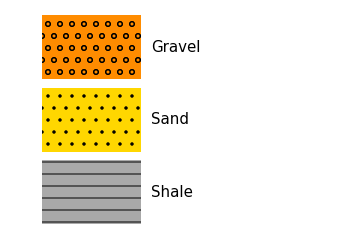

In [3]:
graphiclog.defaults.litholegend.plot()

In [4]:
transforms = {c : graphiclog.utils.string2array_pandas for c in ['depth_m', 'grain_size_mm', 'grain_size_psi']}

beds = pd.read_csv('../data/AllBedsWithProfiles_CLEAN.csv', converters=transforms)
beds.head()

name  count        collection          eod  eodnum      tops       th  \
0  Marnoso 1      1  Marnoso-Arenacea  basin plain       0  22.81684  0.31082   
1  Marnoso 1      1  Marnoso-Arenacea  basin plain       0  22.50602  0.60931   
2  Marnoso 1      1  Marnoso-Arenacea  basin plain       0  21.89671  0.10463   
3  Marnoso 1      1  Marnoso-Arenacea  basin plain       0  21.79208  0.11694   
4  Marnoso 1      1  Marnoso-Arenacea  basin plain       0  21.67514  0.13232   

      bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi        ng  \
0  22.50602    0.115051      -3.1197  ...   0.117046     -3.0948  0.520514   
1  21.89671    0.001000      -9.9658  ...   0.001000     -9.9658  0.520514   
2  21.79208    0.125380      -2.9956  ...   0.125380     -2.9956  0.520514   
3  21.67514    0.001000      -9.9658  ...   0.001000     -9.9658  0.520514   
4  21.54282    0.134306      -2.8964  ...   0.160420     -2.6401  0.520514   

         ar                               depth_m  \
0  0.021978    [22.8168, 22.703, 22.5337, 22.506]   
1  0.021978                     [22.506, 21.8967]   
2  0.021978                    [21.8967, 21.7921]   
3  0.021978                    [21.7921, 21.6751]   
4  0.021978  [21.6751, 21.6351, 21.5674, 21.5428]   

                     rel_depth_m                     grain_size_mm  \
0  [0.     0.1138 0.2831 0.3108]    [0.1151, 0.1157, 0.117, 0.117]   
1                [0.     0.6093]                    [0.001, 0.001]   
2                [0.     0.1046]                  [0.1254, 0.1254]   
3                  [0.    0.117]                    [0.001, 0.001]   
4  [0.     0.04   0.1077 0.1323]  [0.1343, 0.1447, 0.1604, 0.1604]   

                         grain_size_psi  missing_tops missing_sample  
0   [-3.119, -3.1115, -3.0954, -3.0954]           0.0            0.0  
1                    [-9.9658, -9.9658]           0.0            0.0  
2                    [-2.9954, -2.9954]           0.0            0.0  
3                    [-9.9658, -9.9658]           0.0            0.0  
4  [-2.8965, -2.7889, -2.6403, -2.6403]           0.0            0.0  

[5 rows x 25 columns]

In [5]:
beds.columns

Index(['name', 'count', 'collection', 'eod', 'eodnum', 'tops', 'th', 'bases',
       'gs_tops_mm', 'gs_tops_psi', 'snd_shl', 'snd', 'shl', 'mean_gs_mm',
       'mean_gs_psi', 'max_gs_mm', 'max_gs_psi', 'ng', 'ar', 'depth_m',
       'rel_depth_m', 'grain_size_mm', 'grain_size_psi', 'missing_tops',
       'missing_sample'],
      dtype='object')

In [6]:
bed_seqs = []

datacols = ['th', 'gs_tops_psi', 'mean_gs_psi', 'depth_m', 'grain_size_psi']
metacols = ['name', 'count', 'collection', 'eod', 'eodnum']

for name, grp in beds.groupby('count'):
    
    bed_seqs.append(graphiclog.BedSequence.from_dataframe(grp, topcol='tops', basecol='bases',
                                                 component_map=graphiclog.defaults.DEFAULT_COMPONENT_MAP,
                                                 datacols=datacols, metacols=metacols))


         name  count        collection          eod  eodnum      tops  \
0   Marnoso 1      1  Marnoso-Arenacea  basin plain       0  22.81684   
1   Marnoso 1      1  Marnoso-Arenacea  basin plain       0  22.50602   
2   Marnoso 1      1  Marnoso-Arenacea  basin plain       0  21.89671   
3   Marnoso 1      1  Marnoso-Arenacea  basin plain       0  21.79208   
4   Marnoso 1      1  Marnoso-Arenacea  basin plain       0  21.67514   
..        ...    ...               ...          ...     ...       ...   
86  Marnoso 1      1  Marnoso-Arenacea  basin plain       0   2.17508   
87  Marnoso 1      1  Marnoso-Arenacea  basin plain       0   2.13816   
88  Marnoso 1      1  Marnoso-Arenacea  basin plain       0   1.87966   
89  Marnoso 1      1  Marnoso-Arenacea  basin plain       0   1.00159   
90  Marnoso 1      1  Marnoso-Arenacea  basin plain       0   0.81695   

         th     bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
0   0.31082  22.50602    0.115051      -3.119

          name  count        collection          eod  eodnum      tops  \
235  Marnoso 7      5  Marnoso-Arenacea  basin plain       0  19.76957   
236  Marnoso 7      5  Marnoso-Arenacea  basin plain       0  19.48685   
237  Marnoso 7      5  Marnoso-Arenacea  basin plain       0  19.11613   
238  Marnoso 7      5  Marnoso-Arenacea  basin plain       0  19.03879   
239  Marnoso 7      5  Marnoso-Arenacea  basin plain       0  19.01745   
240  Marnoso 7      5  Marnoso-Arenacea  basin plain       0  17.56388   
241  Marnoso 7      5  Marnoso-Arenacea  basin plain       0  17.20115   
242  Marnoso 7      5  Marnoso-Arenacea  basin plain       0  16.95312   
243  Marnoso 7      5  Marnoso-Arenacea  basin plain       0  16.75042   
244  Marnoso 7      5  Marnoso-Arenacea  basin plain       0  16.55038   
245  Marnoso 7      5  Marnoso-Arenacea  basin plain       0  16.51838   
246  Marnoso 7      5  Marnoso-Arenacea  basin plain       0  16.09165   
247  Marnoso 7      5  Marnoso-Arenace

           name  count        collection          eod  eodnum      tops  \
400  Marnoso 11      9  Marnoso-Arenacea  basin plain       0  22.53611   
401  Marnoso 11      9  Marnoso-Arenacea  basin plain       0  22.15613   
402  Marnoso 11      9  Marnoso-Arenacea  basin plain       0  21.92090   
403  Marnoso 11      9  Marnoso-Arenacea  basin plain       0  21.90281   
404  Marnoso 11      9  Marnoso-Arenacea  basin plain       0  20.75924   
405  Marnoso 11      9  Marnoso-Arenacea  basin plain       0  20.44440   
406  Marnoso 11      9  Marnoso-Arenacea  basin plain       0  19.91243   
407  Marnoso 11      9  Marnoso-Arenacea  basin plain       0  19.78576   
408  Marnoso 11      9  Marnoso-Arenacea  basin plain       0  18.91000   
409  Marnoso 11      9  Marnoso-Arenacea  basin plain       0  18.88105   
410  Marnoso 11      9  Marnoso-Arenacea  basin plain       0  17.85328   
411  Marnoso 11      9  Marnoso-Arenacea  basin plain       0  16.66267   
412  Marnoso 11      9  M

            name  count        collection          eod  eodnum      tops  \
585  Marnoso D19     13  Marnoso-Arenacea  basin plain       0  9.141835   
586  Marnoso D19     13  Marnoso-Arenacea  basin plain       0  9.013314   
587  Marnoso D19     13  Marnoso-Arenacea  basin plain       0  8.872837   
588  Marnoso D19     13  Marnoso-Arenacea  basin plain       0  8.328864   
589  Marnoso D19     13  Marnoso-Arenacea  basin plain       0  8.292998   
590  Marnoso D19     13  Marnoso-Arenacea  basin plain       0  7.462343   
591  Marnoso D19     13  Marnoso-Arenacea  basin plain       0  7.406629   
592  Marnoso D19     13  Marnoso-Arenacea  basin plain       0  6.506803   
593  Marnoso D19     13  Marnoso-Arenacea  basin plain       0  6.370810   
594  Marnoso D19     13  Marnoso-Arenacea  basin plain       0  5.290620   
595  Marnoso D19     13  Marnoso-Arenacea  basin plain       0  5.176382   
596  Marnoso D19     13  Marnoso-Arenacea  basin plain       0  4.603238   
597  Marnoso

           name  count        collection          eod  eodnum      tops  \
811  Marnoso 33     19  Marnoso-Arenacea  basin plain       0  19.72529   
812  Marnoso 33     19  Marnoso-Arenacea  basin plain       0  18.80814   
813  Marnoso 33     19  Marnoso-Arenacea  basin plain       0  18.60551   
814  Marnoso 33     19  Marnoso-Arenacea  basin plain       0  17.89810   
815  Marnoso 33     19  Marnoso-Arenacea  basin plain       0  17.85899   
816  Marnoso 33     19  Marnoso-Arenacea  basin plain       0  17.80922   
817  Marnoso 33     19  Marnoso-Arenacea  basin plain       0  17.79500   
818  Marnoso 33     19  Marnoso-Arenacea  basin plain       0  17.16935   
819  Marnoso 33     19  Marnoso-Arenacea  basin plain       0  17.01294   
820  Marnoso 33     19  Marnoso-Arenacea  basin plain       0  16.71433   
821  Marnoso 33     19  Marnoso-Arenacea  basin plain       0  16.68233   
822  Marnoso 33     19  Marnoso-Arenacea  basin plain       0  15.97492   
823  Marnoso 33     19  M

             name  count        collection          eod  eodnum       tops  \
1006  Marnoso E41     24  Marnoso-Arenacea  basin plain       0  18.110000   
1007  Marnoso E41     24  Marnoso-Arenacea  basin plain       0  17.624229   
1008  Marnoso E41     24  Marnoso-Arenacea  basin plain       0  16.865832   
1009  Marnoso E41     24  Marnoso-Arenacea  basin plain       0  16.762934   
1010  Marnoso E41     24  Marnoso-Arenacea  basin plain       0  16.031214   
1011  Marnoso E41     24  Marnoso-Arenacea  basin plain       0  15.962615   
1012  Marnoso E41     24  Marnoso-Arenacea  basin plain       0  14.682106   
1013  Marnoso E41     24  Marnoso-Arenacea  basin plain       0  14.514420   
1014  Marnoso E41     24  Marnoso-Arenacea  basin plain       0  13.165312   
1015  Marnoso E41     24  Marnoso-Arenacea  basin plain       0  12.860429   
1016  Marnoso E41     24  Marnoso-Arenacea  basin plain       0  12.635577   
1017  Marnoso E41     24  Marnoso-Arenacea  basin plain       0 

             name  count        collection          eod  eodnum       tops  \
1192  Marnoso F46     28  Marnoso-Arenacea  basin plain       0  22.130000   
1193  Marnoso F46     28  Marnoso-Arenacea  basin plain       0  21.552954   
1194  Marnoso F46     28  Marnoso-Arenacea  basin plain       0  20.416065   
1195  Marnoso F46     28  Marnoso-Arenacea  basin plain       0  19.914973   
1196  Marnoso F46     28  Marnoso-Arenacea  basin plain       0  19.694061   
1197  Marnoso F46     28  Marnoso-Arenacea  basin plain       0  16.703667   
1198  Marnoso F46     28  Marnoso-Arenacea  basin plain       0  16.639010   
1199  Marnoso F46     28  Marnoso-Arenacea  basin plain       0  16.434263   
1200  Marnoso F46     28  Marnoso-Arenacea  basin plain       0  16.358829   
1201  Marnoso F46     28  Marnoso-Arenacea  basin plain       0  15.453629   
1202  Marnoso F46     28  Marnoso-Arenacea  basin plain       0  15.195001   
1203  Marnoso F46     28  Marnoso-Arenacea  basin plain       0 

                    name  count        collection          eod  eodnum  \
1365  Marnoso D57 and 47     32  Marnoso-Arenacea  basin plain       0   
1366  Marnoso D57 and 47     32  Marnoso-Arenacea  basin plain       0   
1367  Marnoso D57 and 47     32  Marnoso-Arenacea  basin plain       0   
1368  Marnoso D57 and 47     32  Marnoso-Arenacea  basin plain       0   
1369  Marnoso D57 and 47     32  Marnoso-Arenacea  basin plain       0   
1370  Marnoso D57 and 47     32  Marnoso-Arenacea  basin plain       0   
1371  Marnoso D57 and 47     32  Marnoso-Arenacea  basin plain       0   
1372  Marnoso D57 and 47     32  Marnoso-Arenacea  basin plain       0   
1373  Marnoso D57 and 47     32  Marnoso-Arenacea  basin plain       0   
1374  Marnoso D57 and 47     32  Marnoso-Arenacea  basin plain       0   
1375  Marnoso D57 and 47     32  Marnoso-Arenacea  basin plain       0   
1376  Marnoso D57 and 47     32  Marnoso-Arenacea  basin plain       0   
1377  Marnoso D57 and 47     32  Marno

             name  count        collection          eod  eodnum       tops  \
1540  Marnoso D61     36  Marnoso-Arenacea  basin plain       0  14.037582   
1541  Marnoso D61     36  Marnoso-Arenacea  basin plain       0  13.015942   
1542  Marnoso D61     36  Marnoso-Arenacea  basin plain       0  12.737313   
1543  Marnoso D61     36  Marnoso-Arenacea  basin plain       0  10.702477   
1544  Marnoso D61     36  Marnoso-Arenacea  basin plain       0   9.866590   
1545  Marnoso D61     36  Marnoso-Arenacea  basin plain       0   8.652853   
1546  Marnoso D61     36  Marnoso-Arenacea  basin plain       0   7.841749   
1547  Marnoso D61     36  Marnoso-Arenacea  basin plain       0   7.068198   
1548  Marnoso D61     36  Marnoso-Arenacea  basin plain       0   6.242131   
1549  Marnoso D61     36  Marnoso-Arenacea  basin plain       0   5.857238   
1550  Marnoso D61     36  Marnoso-Arenacea  basin plain       0   5.780259   
1551  Marnoso D61     36  Marnoso-Arenacea  basin plain       0 

             name  count        collection          eod  eodnum       tops  \
1689  Marnoso E66     40  Marnoso-Arenacea  basin plain       0  16.745534   
1690  Marnoso E66     40  Marnoso-Arenacea  basin plain       0  15.524764   
1691  Marnoso E66     40  Marnoso-Arenacea  basin plain       0  15.040799   
1692  Marnoso E66     40  Marnoso-Arenacea  basin plain       0  14.301604   
1693  Marnoso E66     40  Marnoso-Arenacea  basin plain       0  14.231340   
1694  Marnoso E66     40  Marnoso-Arenacea  basin plain       0  14.112195   
1695  Marnoso E66     40  Marnoso-Arenacea  basin plain       0  14.038875   
1696  Marnoso E66     40  Marnoso-Arenacea  basin plain       0  13.229407   
1697  Marnoso E66     40  Marnoso-Arenacea  basin plain       0  13.140735   
1698  Marnoso E66     40  Marnoso-Arenacea  basin plain       0  12.924374   
1699  Marnoso E66     40  Marnoso-Arenacea  basin plain       0  12.874718   
1700  Marnoso E66     40  Marnoso-Arenacea  basin plain       0 

            name  count        collection          eod  eodnum      tops  \
1919  Marnoso 75     44  Marnoso-Arenacea  basin plain       0  23.91334   
1920  Marnoso 75     44  Marnoso-Arenacea  basin plain       0  23.43327   
1921  Marnoso 75     44  Marnoso-Arenacea  basin plain       0  23.02091   
1922  Marnoso 75     44  Marnoso-Arenacea  basin plain       0  22.56238   
1923  Marnoso 75     44  Marnoso-Arenacea  basin plain       0  22.35619   
...          ...    ...               ...          ...     ...       ...   
1985  Marnoso 75     44  Marnoso-Arenacea  basin plain       0   1.66091   
1986  Marnoso 75     44  Marnoso-Arenacea  basin plain       0   1.51628   
1987  Marnoso 75     44  Marnoso-Arenacea  basin plain       0   1.48550   
1988  Marnoso 75     44  Marnoso-Arenacea  basin plain       0   1.10391   
1989  Marnoso 75     44  Marnoso-Arenacea  basin plain       0   0.98184   

           th     bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
1919  0

            name  count        collection          eod  eodnum      tops  \
2207  Marnoso 83     48  Marnoso-Arenacea  basin plain       0  21.01862   
2208  Marnoso 83     48  Marnoso-Arenacea  basin plain       0  19.75069   
2209  Marnoso 83     48  Marnoso-Arenacea  basin plain       0  19.26445   
2210  Marnoso 83     48  Marnoso-Arenacea  basin plain       0  19.21520   
2211  Marnoso 83     48  Marnoso-Arenacea  basin plain       0  18.88078   
2212  Marnoso 83     48  Marnoso-Arenacea  basin plain       0  18.46122   
2213  Marnoso 83     48  Marnoso-Arenacea  basin plain       0  17.52566   
2214  Marnoso 83     48  Marnoso-Arenacea  basin plain       0  16.92247   
2215  Marnoso 83     48  Marnoso-Arenacea  basin plain       0  16.87631   
2216  Marnoso 83     48  Marnoso-Arenacea  basin plain       0  15.98691   
2217  Marnoso 83     48  Marnoso-Arenacea  basin plain       0  15.69147   
2218  Marnoso 83     48  Marnoso-Arenacea  basin plain       0  15.58684   
2219  Marnos

             name  count        collection          eod  eodnum       tops  \
2414  Marnoso E88     52  Marnoso-Arenacea  basin plain       0  21.764667   
2415  Marnoso E88     52  Marnoso-Arenacea  basin plain       0  21.608562   
2416  Marnoso E88     52  Marnoso-Arenacea  basin plain       0  20.744277   
2417  Marnoso E88     52  Marnoso-Arenacea  basin plain       0  20.633861   
2418  Marnoso E88     52  Marnoso-Arenacea  basin plain       0  20.550098   
2419  Marnoso E88     52  Marnoso-Arenacea  basin plain       0  19.933295   
2420  Marnoso E88     52  Marnoso-Arenacea  basin plain       0  19.651546   
2421  Marnoso E88     52  Marnoso-Arenacea  basin plain       0  19.567783   
2422  Marnoso E88     52  Marnoso-Arenacea  basin plain       0  17.846827   
2423  Marnoso E88     52  Marnoso-Arenacea  basin plain       0  17.686915   
2424  Marnoso E88     52  Marnoso-Arenacea  basin plain       0  16.335279   
2425  Marnoso E88     52  Marnoso-Arenacea  basin plain       0 

             name  count        collection          eod  eodnum       tops  \
2603  Marnoso F93     56  Marnoso-Arenacea  basin plain       0  22.508871   
2604  Marnoso F93     56  Marnoso-Arenacea  basin plain       0  22.233691   
2605  Marnoso F93     56  Marnoso-Arenacea  basin plain       0  20.496357   
2606  Marnoso F93     56  Marnoso-Arenacea  basin plain       0  20.282784   
2607  Marnoso F93     56  Marnoso-Arenacea  basin plain       0  19.506529   
2608  Marnoso F93     56  Marnoso-Arenacea  basin plain       0  19.370993   
2609  Marnoso F93     56  Marnoso-Arenacea  basin plain       0  19.329921   
2610  Marnoso F93     56  Marnoso-Arenacea  basin plain       0  17.255799   
2611  Marnoso F93     56  Marnoso-Arenacea  basin plain       0  15.818290   
2612  Marnoso F93     56  Marnoso-Arenacea  basin plain       0  14.421852   
2613  Marnoso F93     56  Marnoso-Arenacea  basin plain       0  14.347922   
2614  Marnoso F93     56  Marnoso-Arenacea  basin plain       0 

              name  count        collection          eod  eodnum       tops  \
2771  Marnoso D103     61  Marnoso-Arenacea  basin plain       0  22.650000   
2772  Marnoso D103     61  Marnoso-Arenacea  basin plain       0  22.019149   
2773  Marnoso D103     61  Marnoso-Arenacea  basin plain       0  21.798650   
2774  Marnoso D103     61  Marnoso-Arenacea  basin plain       0  21.086619   
2775  Marnoso D103     61  Marnoso-Arenacea  basin plain       0  21.007940   
2776  Marnoso D103     61  Marnoso-Arenacea  basin plain       0  20.338107   
2777  Marnoso D103     61  Marnoso-Arenacea  basin plain       0  20.089311   
2778  Marnoso D103     61  Marnoso-Arenacea  basin plain       0  19.778849   
2779  Marnoso D103     61  Marnoso-Arenacea  basin plain       0  19.731282   
2780  Marnoso D103     61  Marnoso-Arenacea  basin plain       0  18.939995   
2781  Marnoso D103     61  Marnoso-Arenacea  basin plain       0  18.840624   
2782  Marnoso D103     61  Marnoso-Arenacea  basin p

             name  count collection  eod  eodnum       tops       th  \
3123  Amazon 946A     65     Amazon  fan       1   92.80022  0.27446   
3124  Amazon 946A     65     Amazon  fan       1   93.07468  0.10142   
3125  Amazon 946A     65     Amazon  fan       1   93.17610  0.31621   
3126  Amazon 946A     65     Amazon  fan       1   93.49231  0.16109   
3127  Amazon 946A     65     Amazon  fan       1   93.65340  0.12530   
...           ...    ...        ...  ...     ...        ...      ...   
3280  Amazon 946A     65     Amazon  fan       1  259.62802  0.20874   
3281  Amazon 946A     65     Amazon  fan       1  259.83676  2.26563   
3282  Amazon 946A     65     Amazon  fan       1  262.10239  0.11459   
3283  Amazon 946A     65     Amazon  fan       1  262.21698  0.75317   
3284  Amazon 946A     65     Amazon  fan       1  262.97015  7.00760   

          bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
3123   93.07468    0.129433      -2.9497  ...   0.129433     -2

         name  count collection    eod  eodnum       tops        th  \
3457  Grand 1     68    Nigeria  levee       3   0.000000  5.211595   
3458  Grand 1     68    Nigeria  levee       3   5.211595  0.013123   
3459  Grand 1     68    Nigeria  levee       3   5.224717  0.022496   
3460  Grand 1     68    Nigeria  levee       3   5.247213  0.022496   
3461  Grand 1     68    Nigeria  levee       3   5.269710  0.011248   
...       ...    ...        ...    ...     ...        ...       ...   
3566  Grand 1     68    Nigeria  levee       3   7.641173  0.003749   
3567  Grand 1     68    Nigeria  levee       3   7.644922  0.074987   
3568  Grand 1     68    Nigeria  levee       3   7.719909  0.005624   
3569  Grand 1     68    Nigeria  levee       3   7.725533  5.873355   
3570  Grand 1     68    Nigeria  levee       3  13.598887  0.052491   

          bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
3457   5.211595    0.001006      -9.9569  ...   0.008534     -6.8725   
345

         name  count collection           eod  eodnum      tops        th  \
3906  Grand 5     72    Nigeria  slopechannel       2  0.000000  6.853842   
3907  Grand 5     72    Nigeria  slopechannel       2  6.853842  0.288369   
3908  Grand 5     72    Nigeria  slopechannel       2  7.142211  0.056862   
3909  Grand 5     72    Nigeria  slopechannel       2  7.199073  0.144185   
3910  Grand 5     72    Nigeria  slopechannel       2  7.343257  0.134031   
3911  Grand 5     72    Nigeria  slopechannel       2  7.477288  0.056862   

         bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi        ng  \
3906  6.853842    0.001066      -9.8734  ...   0.001066     -9.8734  0.019137   
3907  7.142211    0.001000      -9.9658  ...   0.001066     -9.8734  0.019137   
3908  7.199073    0.001066      -9.8734  ...   0.001066     -9.8734  0.019137   
3909  7.343257    0.128827      -2.9565  ...   0.128827     -2.9565  0.019137   
3910  7.477288    0.001066      -9.8734  ...   0.128827

          name  count collection    eod  eodnum       tops        th  \
4311  Grand 10     76    Nigeria  levee       3   0.000000  4.693105   
4312  Grand 10     76    Nigeria  levee       3   4.693105  0.012185   
4313  Grand 10     76    Nigeria  levee       3   4.705289  0.272123   
4314  Grand 10     76    Nigeria  levee       3   4.977412  0.044677   
4315  Grand 10     76    Nigeria  levee       3   5.022089  0.328984   
4316  Grand 10     76    Nigeria  levee       3   5.351074  0.012185   
4317  Grand 10     76    Nigeria  levee       3   5.363258  0.196984   
4318  Grand 10     76    Nigeria  levee       3   5.560243  0.010154   
4319  Grand 10     76    Nigeria  levee       3   5.570397  0.107631   
4320  Grand 10     76    Nigeria  levee       3   5.678027  0.012185   
4321  Grand 10     76    Nigeria  levee       3   5.690212  0.046708   
4322  Grand 10     76    Nigeria  levee       3   5.736920  0.010154   
4323  Grand 10     76    Nigeria  levee       3   5.747073  0.01

          name  count collection    eod  eodnum       tops        th  \
4487  Grand 16     82    Nigeria  levee       3   0.000000  0.751384   
4488  Grand 16     82    Nigeria  levee       3   0.751384  0.020308   
4489  Grand 16     82    Nigeria  levee       3   0.771692  0.978830   
4490  Grand 16     82    Nigeria  levee       3   1.750522  0.012185   
4491  Grand 16     82    Nigeria  levee       3   1.762707  0.988984   
...        ...    ...        ...    ...     ...        ...       ...   
4743  Grand 16     82    Nigeria  levee       3  12.665900  0.034523   
4744  Grand 16     82    Nigeria  levee       3  12.700423  0.018277   
4745  Grand 16     82    Nigeria  levee       3  12.718700  0.012185   
4746  Grand 16     82    Nigeria  levee       3  12.730885  0.103569   
4747  Grand 16     82    Nigeria  levee       3  12.834454  0.064985   

          bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
4487   0.751384    0.001063      -9.8781  ...   0.001063     -9

          name  count collection    eod  eodnum       tops        th  \
5028  Grand 20     86    Nigeria  levee       3   0.000000  2.814644   
5029  Grand 20     86    Nigeria  levee       3   2.814644  0.020308   
5030  Grand 20     86    Nigeria  levee       3   2.834952  1.979999   
5031  Grand 20     86    Nigeria  levee       3   4.814951  0.020308   
5032  Grand 20     86    Nigeria  levee       3   4.835259  0.326954   
...        ...    ...        ...    ...     ...        ...       ...   
5157  Grand 20     86    Nigeria  levee       3   8.571872  0.006092   
5158  Grand 20     86    Nigeria  levee       3   8.577964  0.034523   
5159  Grand 20     86    Nigeria  levee       3   8.612487  0.006092   
5160  Grand 20     86    Nigeria  levee       3   8.618579  6.092304   
5161  Grand 20     86    Nigeria  levee       3  14.710883  0.079200   

          bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
5028   2.814644    0.016000      -5.9658  ...   0.016000     -5

       name  count collection  eod  eodnum       tops         th      bases  \
5490  Fan 1     89    Nigeria  fan       1   0.000000   0.813604   0.813604   
5491  Fan 1     89    Nigeria  fan       1   0.813604   0.013005   0.826609   
5492  Fan 1     89    Nigeria  fan       1   0.826609   1.272018   2.098627   
5493  Fan 1     89    Nigeria  fan       1   2.098627   0.226022   2.324649   
5494  Fan 1     89    Nigeria  fan       1   2.324649   0.067396   2.392044   
5495  Fan 1     89    Nigeria  fan       1   2.392044  10.252547  12.644591   
5496  Fan 1     89    Nigeria  fan       1  12.644591   0.018694  12.663285   
5497  Fan 1     89    Nigeria  fan       1  12.663285   0.007315  12.670601   
5498  Fan 1     89    Nigeria  fan       1  12.670601   0.014630  12.685231   

      gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi        ng        ar  \
5490    0.001032      -9.9201  ...   0.001032     -9.9201  0.026783  0.111111   
5491    1.000000       0.0000  ...   1.000000  

                name  count collection  eod  eodnum      tops        th  \
5560  Fan 7 (3 inch)    100    Nigeria  fan       1  0.000000  0.450286   
5561  Fan 7 (3 inch)    100    Nigeria  fan       1  0.450286  0.034137   
5562  Fan 7 (3 inch)    100    Nigeria  fan       1  0.484423  0.973724   
5563  Fan 7 (3 inch)    100    Nigeria  fan       1  1.458147  0.026822   
5564  Fan 7 (3 inch)    100    Nigeria  fan       1  1.484969  0.989980   
5565  Fan 7 (3 inch)    100    Nigeria  fan       1  2.474949  0.052019   
5566  Fan 7 (3 inch)    100    Nigeria  fan       1  2.526968  0.113791   
5567  Fan 7 (3 inch)    100    Nigeria  fan       1  2.640758  0.349500   
5568  Fan 7 (3 inch)    100    Nigeria  fan       1  2.990258  0.133298   
5569  Fan 7 (3 inch)    100    Nigeria  fan       1  3.123556  0.334870   
5570  Fan 7 (3 inch)    100    Nigeria  fan       1  3.458426  0.195070   
5571  Fan 7 (3 inch)    100    Nigeria  fan       1  3.653496  0.004064   
5572  Fan 7 (3 inch)    1

        name  count collection  eod  eodnum      tops        th     bases  \
5703  Fan 15    108    Nigeria  fan       1  0.000000  0.383637  0.383637   
5704  Fan 15    108    Nigeria  fan       1  0.383637  0.059334  0.442971   
5705  Fan 15    108    Nigeria  fan       1  0.442971  0.935523  1.378494   
5706  Fan 15    108    Nigeria  fan       1  1.378494  0.052831  1.431325   
5707  Fan 15    108    Nigeria  fan       1  1.431325  1.511791  2.943117   
5708  Fan 15    108    Nigeria  fan       1  2.943117  0.130859  3.073976   
5709  Fan 15    108    Nigeria  fan       1  3.073976  0.335683  3.409659   
5710  Fan 15    108    Nigeria  fan       1  3.409659  0.109793  3.519452   
5711  Fan 15    108    Nigeria  fan       1  3.519452  0.120227  3.639679   
5712  Fan 15    108    Nigeria  fan       1  3.639679  0.168248  3.807926   
5713  Fan 15    108    Nigeria  fan       1  3.807926  0.333244  4.141171   
5714  Fan 15    108    Nigeria  fan       1  4.141171  1.956388  6.097559   

                 name  count collection  eod  eodnum      tops        th  \
5815  Fan 23 (3 inch)    115    Nigeria  fan       1  0.000000  0.256029   
5816  Fan 23 (3 inch)    115    Nigeria  fan       1  0.256029  0.013005   
5817  Fan 23 (3 inch)    115    Nigeria  fan       1  0.269034  0.983477   
5818  Fan 23 (3 inch)    115    Nigeria  fan       1  1.252511  0.013817   
5819  Fan 23 (3 inch)    115    Nigeria  fan       1  1.266329  0.983477   
5820  Fan 23 (3 inch)    115    Nigeria  fan       1  2.249806  0.019507   
5821  Fan 23 (3 inch)    115    Nigeria  fan       1  2.269313  0.563264   
5822  Fan 23 (3 inch)    115    Nigeria  fan       1  2.832577  0.041452   
5823  Fan 23 (3 inch)    115    Nigeria  fan       1  2.874029  0.358441   
5824  Fan 23 (3 inch)    115    Nigeria  fan       1  3.232470  0.007315   
5825  Fan 23 (3 inch)    115    Nigeria  fan       1  3.239785  0.006502   
5826  Fan 23 (3 inch)    115    Nigeria  fan       1  3.246288  0.007315   
5827  Fan 23

        name  count collection    eod  eodnum      tops        th     bases  \
6013  Bend 6    122    Nigeria  levee       3  0.000000  0.840426  0.840426   
6014  Bend 6    122    Nigeria  levee       3  0.840426  0.033324  0.873750   
6015  Bend 6    122    Nigeria  levee       3  0.873750  0.968034  1.841785   
6016  Bend 6    122    Nigeria  levee       3  1.841785  0.020320  1.862104   
6017  Bend 6    122    Nigeria  levee       3  1.862104  0.512058  2.374163   
...      ...    ...        ...    ...     ...       ...       ...       ...   
6095  Bend 6    122    Nigeria  levee       3  5.680597  0.001626  5.682223   
6096  Bend 6    122    Nigeria  levee       3  5.682223  0.066649  5.748871   
6097  Bend 6    122    Nigeria  levee       3  5.748871  0.002438  5.751310   
6098  Bend 6    122    Nigeria  levee       3  5.751310  0.148741  5.900051   
6099  Bend 6    122    Nigeria  levee       3  5.900051  0.011379  5.911430   

      gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_

              name  count  collection    eod  eodnum       tops        th  \
6205  Cerro Toro 1    127  Cerro Toro  levee       3  26.107568  0.042593   
6206  Cerro Toro 1    127  Cerro Toro  levee       3  26.064975  0.167728   
6207  Cerro Toro 1    127  Cerro Toro  levee       3  25.897247  0.053681   
6208  Cerro Toro 1    127  Cerro Toro  levee       3  25.843565  1.705981   
6209  Cerro Toro 1    127  Cerro Toro  levee       3  24.137584  0.080245   
...            ...    ...         ...    ...     ...        ...       ...   
6294  Cerro Toro 1    127  Cerro Toro  levee       3   5.831827  0.964259   
6295  Cerro Toro 1    127  Cerro Toro  levee       3   4.867568  0.625806   
6296  Cerro Toro 1    127  Cerro Toro  levee       3   4.241761  1.604367   
6297  Cerro Toro 1    127  Cerro Toro  levee       3   2.637395  0.356433   
6298  Cerro Toro 1    127  Cerro Toro  levee       3   2.280962  2.280962   

          bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
620

              name  count  collection    eod  eodnum       tops        th  \
6539  Cerro Toro 5    131  Cerro Toro  levee       3  18.384838  0.115970   
6540  Cerro Toro 5    131  Cerro Toro  levee       3  18.268868  2.896810   
6541  Cerro Toro 5    131  Cerro Toro  levee       3  15.372058  0.139065   
6542  Cerro Toro 5    131  Cerro Toro  levee       3  15.232993  0.694487   
6543  Cerro Toro 5    131  Cerro Toro  levee       3  14.538506  0.073880   
6544  Cerro Toro 5    131  Cerro Toro  levee       3  14.464625  0.463390   
6545  Cerro Toro 5    131  Cerro Toro  levee       3  14.001235  0.053761   
6546  Cerro Toro 5    131  Cerro Toro  levee       3  13.947474  0.223809   
6547  Cerro Toro 5    131  Cerro Toro  levee       3  13.723666  0.076252   
6548  Cerro Toro 5    131  Cerro Toro  levee       3  13.647414  0.198983   
6549  Cerro Toro 5    131  Cerro Toro  levee       3  13.448431  0.048808   
6550  Cerro Toro 5    131  Cerro Toro  levee       3  13.399624  0.309113   

           name  count collection    eod  eodnum      tops       th     bases  \
7428  Rosario 2    133    Rosario  levee       3  31.50419  0.53261  30.97158   
7429  Rosario 2    133    Rosario  levee       3  30.97158  0.01573  30.95585   
7430  Rosario 2    133    Rosario  levee       3  30.95585  0.21061  30.74524   
7431  Rosario 2    133    Rosario  levee       3  30.74524  0.03127  30.71397   
7432  Rosario 2    133    Rosario  levee       3  30.71397  0.07992  30.63405   
...         ...    ...        ...    ...     ...       ...      ...       ...   
7893  Rosario 2    133    Rosario  levee       3   0.32885  0.01523   0.31362   
7894  Rosario 2    133    Rosario  levee       3   0.31362  0.18706   0.12656   
7895  Rosario 2    133    Rosario  levee       3   0.12656  0.01488   0.11168   
7896  Rosario 2    133    Rosario  levee       3   0.11168  0.11001   0.00167   
7897  Rosario 2    133    Rosario  levee       3   0.00167  0.00167   0.00000   

      gs_tops_mm  gs_tops_p

                name  count              collection          eod  eodnum  \
12692  ODP Site 1015    136  California Borderlands  basin plain       0   
12693  ODP Site 1015    136  California Borderlands  basin plain       0   
12694  ODP Site 1015    136  California Borderlands  basin plain       0   
12695  ODP Site 1015    136  California Borderlands  basin plain       0   
12696  ODP Site 1015    136  California Borderlands  basin plain       0   
12697  ODP Site 1015    136  California Borderlands  basin plain       0   
12698  ODP Site 1015    136  California Borderlands  basin plain       0   
12699  ODP Site 1015    136  California Borderlands  basin plain       0   
12700  ODP Site 1015    136  California Borderlands  basin plain       0   
12701  ODP Site 1015    136  California Borderlands  basin plain       0   
12702  ODP Site 1015    136  California Borderlands  basin plain       0   
12703  ODP Site 1015    136  California Borderlands  basin plain       0   
12704  ODP S

             name  count collection  eod  eodnum      tops        th  \
12854  Golo Kco66    142       Golo  fan       1  0.030886  0.809433   
12855  Golo Kco66    142       Golo  fan       1  0.840319  3.938588   
12856  Golo Kco66    142       Golo  fan       1  4.778907  0.091841   
12857  Golo Kco66    142       Golo  fan       1  4.870748  0.059040   
12858  Golo Kco66    142       Golo  fan       1  4.929788  0.354243   
12859  Golo Kco66    142       Golo  fan       1  5.284031  0.077591   
12860  Golo Kco66    142       Golo  fan       1  5.361622  0.103937   
12861  Golo Kco66    142       Golo  fan       1  5.465559  0.330155   
12862  Golo Kco66    142       Golo  fan       1  5.795714  0.118081   
12863  Golo Kco66    142       Golo  fan       1  5.913795  0.217012   
12864  Golo Kco66    142       Golo  fan       1  6.130807  0.839156   
12865  Golo Kco66    142       Golo  fan       1  6.969963  0.056178   
12866  Golo Kco66    142       Golo  fan       1  7.026141  1.86

             name  count collection  eod  eodnum       tops        th  \
13069  Karoo krf5    150      Karoo  fan       1  23.914532  0.131124   
13070  Karoo krf5    150      Karoo  fan       1  23.783408  2.534114   
13071  Karoo krf5    150      Karoo  fan       1  21.249294  1.033632   
13072  Karoo krf5    150      Karoo  fan       1  20.215662  1.049136   
13073  Karoo krf5    150      Karoo  fan       1  19.166526  1.163498   
13074  Karoo krf5    150      Karoo  fan       1  18.003028  0.567467   
13075  Karoo krf5    150      Karoo  fan       1  17.435561  0.118772   
13076  Karoo krf5    150      Karoo  fan       1  17.316789  0.125789   
13077  Karoo krf5    150      Karoo  fan       1  17.191000  0.033091   
13078  Karoo krf5    150      Karoo  fan       1  17.157909  0.411066   
13079  Karoo krf5    150      Karoo  fan       1  16.746843  0.044788   
13080  Karoo krf5    150      Karoo  fan       1  16.702055  0.227384   
13081  Karoo krf5    150      Karoo  fan       1  1

             name  count collection  eod  eodnum       tops        th  \
13408  Karoo krf7    152      Karoo  fan       1  45.000000  0.331468   
13409  Karoo krf7    152      Karoo  fan       1  44.668532  0.093008   
13410  Karoo krf7    152      Karoo  fan       1  44.575524  0.479131   
13411  Karoo krf7    152      Karoo  fan       1  44.096393  0.047913   
13412  Karoo krf7    152      Karoo  fan       1  44.048480  0.372993   
...           ...    ...        ...  ...     ...        ...       ...   
13608  Karoo krf7    152      Karoo  fan       1   2.986445  0.175506   
13609  Karoo krf7    152      Karoo  fan       1   2.810939  0.175506   
13610  Karoo krf7    152      Karoo  fan       1   2.635433  2.302641   
13611  Karoo krf7    152      Karoo  fan       1   0.332792  0.144634   
13612  Karoo krf7    152      Karoo  fan       1   0.188158  0.188158   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
13408  44.668532    0.009271      -6.7530  ...   0

              name  count collection  eod  eodnum       tops        th  \
14269  Karoo krf11    156      Karoo  fan       1  14.132304  0.018412   
14270  Karoo krf11    156      Karoo  fan       1  14.113892  0.162023   
14271  Karoo krf11    156      Karoo  fan       1  13.951868  0.027004   
14272  Karoo krf11    156      Karoo  fan       1  13.924864  0.099423   
14273  Karoo krf11    156      Karoo  fan       1  13.825441  0.035707   
14274  Karoo krf11    156      Karoo  fan       1  13.789734  0.948575   
14275  Karoo krf11    156      Karoo  fan       1  12.841160  0.030723   
14276  Karoo krf11    156      Karoo  fan       1  12.810437  0.117132   
14277  Karoo krf11    156      Karoo  fan       1  12.693305  0.086409   
14278  Karoo krf11    156      Karoo  fan       1  12.606896  0.034563   
14279  Karoo krf11    156      Karoo  fan       1  12.572333  0.040964   
14280  Karoo krf11    156      Karoo  fan       1  12.531369  1.408141   
14281  Karoo krf11    156      Karoo  

              name  count collection  eod  eodnum       tops        th  \
14498  Karoo krf15    160      Karoo  fan       1  12.579052  0.132853   
14499  Karoo krf15    160      Karoo  fan       1  12.446199  0.288042   
14500  Karoo krf15    160      Karoo  fan       1  12.158158  0.020918   
14501  Karoo krf15    160      Karoo  fan       1  12.137239  0.383111   
14502  Karoo krf15    160      Karoo  fan       1  11.754129  0.030896   
14503  Karoo krf15    160      Karoo  fan       1  11.723233  0.228630   
14504  Karoo krf15    160      Karoo  fan       1  11.494602  3.116140   
14505  Karoo krf15    160      Karoo  fan       1   8.378463  0.388279   
14506  Karoo krf15    160      Karoo  fan       1   7.990184  0.020801   
14507  Karoo krf15    160      Karoo  fan       1   7.969383  0.532626   
14508  Karoo krf15    160      Karoo  fan       1   7.436757  0.022444   
14509  Karoo krf15    160      Karoo  fan       1   7.414313  0.161188   
14510  Karoo krf15    160      Karoo  

               name  count collection  eod  eodnum       tops        th  \
14816  Karoo Loskop    163      Karoo  fan       1  40.698169  0.622085   
14817  Karoo Loskop    163      Karoo  fan       1  40.076084  0.033031   
14818  Karoo Loskop    163      Karoo  fan       1  40.043053  0.115609   
14819  Karoo Loskop    163      Karoo  fan       1  39.927445  0.082578   
14820  Karoo Loskop    163      Karoo  fan       1  39.844867  0.099093   
...             ...    ...        ...  ...     ...        ...       ...   
15050  Karoo Loskop    163      Karoo  fan       1   0.429873  0.085158   
15051  Karoo Loskop    163      Karoo  fan       1   0.344715  0.138490   
15052  Karoo Loskop    163      Karoo  fan       1   0.206225  0.085158   
15053  Karoo Loskop    163      Karoo  fan       1   0.121067  0.031827   
15054  Karoo Loskop    163      Karoo  fan       1   0.089240  0.089240   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
14816  40.076084    0.1379

               name  count  collection  eod  eodnum      tops        th  \
15339  Point Loma 8    170  Point Loma  fan       1  9.756287  0.103760   
15340  Point Loma 8    170  Point Loma  fan       1  9.652527  0.047433   
15341  Point Loma 8    170  Point Loma  fan       1  9.605093  0.136370   
15342  Point Loma 8    170  Point Loma  fan       1  9.468723  0.219378   
15343  Point Loma 8    170  Point Loma  fan       1  9.249345  0.071150   
15344  Point Loma 8    170  Point Loma  fan       1  9.178195  0.171945   
15345  Point Loma 8    170  Point Loma  fan       1  9.006250  0.106725   
15346  Point Loma 8    170  Point Loma  fan       1  8.899526  0.453399   
15347  Point Loma 8    170  Point Loma  fan       1  8.446126  0.101796   
15348  Point Loma 8    170  Point Loma  fan       1  8.344330  0.245509   
15349  Point Loma 8    170  Point Loma  fan       1  8.098821  0.101796   
15350  Point Loma 8    170  Point Loma  fan       1  7.997025  0.041916   
15351  Point Loma 8    17

                 name  count collection  eod  eodnum       tops        th  \
15562  West Kilcloher    174       Ross  fan       1  40.100042  0.222327   
15563  West Kilcloher    174       Ross  fan       1  39.877715  1.039264   
15564  West Kilcloher    174       Ross  fan       1  38.838452  0.130002   
15565  West Kilcloher    174       Ross  fan       1  38.708450  0.074751   
15566  West Kilcloher    174       Ross  fan       1  38.633699  0.029250   
...               ...    ...        ...  ...     ...        ...       ...   
15826  West Kilcloher    174       Ross  fan       1   3.778912  0.034195   
15827  West Kilcloher    174       Ross  fan       1   3.744718  0.047018   
15828  West Kilcloher    174       Ross  fan       1   3.697700  0.038469   
15829  West Kilcloher    174       Ross  fan       1   3.659231  1.234021   
15830  West Kilcloher    174       Ross  fan       1   2.425210  2.421254   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
15

                       name  count collection  eod  eodnum       tops  \
15844  Kilbaha s1150 - 1200    176       Ross  fan       1  11.452951   
15845  Kilbaha s1150 - 1200    176       Ross  fan       1  10.465712   
15846  Kilbaha s1150 - 1200    176       Ross  fan       1   9.979460   
15847  Kilbaha s1150 - 1200    176       Ross  fan       1   9.095366   
15848  Kilbaha s1150 - 1200    176       Ross  fan       1   8.940318   
15849  Kilbaha s1150 - 1200    176       Ross  fan       1   8.611023   
15850  Kilbaha s1150 - 1200    176       Ross  fan       1   8.472535   
15851  Kilbaha s1150 - 1200    176       Ross  fan       1   8.284529   
15852  Kilbaha s1150 - 1200    176       Ross  fan       1   8.038839   
15853  Kilbaha s1150 - 1200    176       Ross  fan       1   7.570669   
15854  Kilbaha s1150 - 1200    176       Ross  fan       1   6.964656   
15855  Kilbaha s1150 - 1200    176       Ross  fan       1   6.768269   
15856  Kilbaha s1150 - 1200    176       Ross  fan 

                name  count collection  eod  eodnum       tops        th  \
16087  Kilbaha s2200    183       Ross  fan       1  14.708308  1.612742   
16088  Kilbaha s2200    183       Ross  fan       1  13.095566  0.126957   
16089  Kilbaha s2200    183       Ross  fan       1  12.968609  0.141723   
16090  Kilbaha s2200    183       Ross  fan       1  12.826886  0.166158   
16091  Kilbaha s2200    183       Ross  fan       1  12.660728  0.078192   
...              ...    ...        ...  ...     ...        ...       ...   
16155  Kilbaha s2200    183       Ross  fan       1   1.383719  0.902525   
16156  Kilbaha s2200    183       Ross  fan       1   0.481193  0.039061   
16157  Kilbaha s2200    183       Ross  fan       1   0.442132  0.112656   
16158  Kilbaha s2200    183       Ross  fan       1   0.329476  0.042213   
16159  Kilbaha s2200    183       Ross  fan       1   0.287263  0.287263   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
16087  13.0955

                name  count collection  eod  eodnum       tops        th  \
16362  Kilbaha s3000    187       Ross  fan       1  15.849600  0.028503   
16363  Kilbaha s3000    187       Ross  fan       1  15.821097  0.303946   
16364  Kilbaha s3000    187       Ross  fan       1  15.517151  0.069079   
16365  Kilbaha s3000    187       Ross  fan       1  15.448072  0.297196   
16366  Kilbaha s3000    187       Ross  fan       1  15.150876  0.217564   
...              ...    ...        ...  ...     ...        ...       ...   
16456  Kilbaha s3000    187       Ross  fan       1   0.173494  0.030757   
16457  Kilbaha s3000    187       Ross  fan       1   0.142737  0.052287   
16458  Kilbaha s3000    187       Ross  fan       1   0.090450  0.030757   
16459  Kilbaha s3000    187       Ross  fan       1   0.059692  0.030757   
16460  Kilbaha s3000    187       Ross  fan       1   0.028935  0.027682   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
16362  15.8210

                name  count collection  eod  eodnum       tops        th  \
16675  Kilbaha s3700    190       Ross  fan       1  16.643172  0.307118   
16676  Kilbaha s3700    190       Ross  fan       1  16.336054  0.307118   
16677  Kilbaha s3700    190       Ross  fan       1  16.028936  0.104420   
16678  Kilbaha s3700    190       Ross  fan       1  15.924515  0.156974   
16679  Kilbaha s3700    190       Ross  fan       1  15.767541  0.088720   
...              ...    ...        ...  ...     ...        ...       ...   
16753  Kilbaha s3700    190       Ross  fan       1   1.589710  1.004176   
16754  Kilbaha s3700    190       Ross  fan       1   0.585534  0.154160   
16755  Kilbaha s3700    190       Ross  fan       1   0.431374  0.203920   
16756  Kilbaha s3700    190       Ross  fan       1   0.227454  0.056242   
16757  Kilbaha s3700    190       Ross  fan       1   0.171212  0.166015   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
16675  16.3360

                name  count collection  eod  eodnum       tops        th  \
16984  Kilbaha s4400    194       Ross  fan       1  11.920955  0.788822   
16985  Kilbaha s4400    194       Ross  fan       1  11.132133  0.041667   
16986  Kilbaha s4400    194       Ross  fan       1  11.090466  0.016735   
16987  Kilbaha s4400    194       Ross  fan       1  11.073731  0.021460   
16988  Kilbaha s4400    194       Ross  fan       1  11.052271  1.256068   
...              ...    ...        ...  ...     ...        ...       ...   
17053  Kilbaha s4400    194       Ross  fan       1   0.173055  0.057862   
17054  Kilbaha s4400    194       Ross  fan       1   0.115194  0.016532   
17055  Kilbaha s4400    194       Ross  fan       1   0.098662  0.049596   
17056  Kilbaha s4400    194       Ross  fan       1   0.049066  0.024798   
17057  Kilbaha s4400    194       Ross  fan       1   0.024268  0.024268   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
16984  11.1321

               name  count collection  eod  eodnum      tops        th  \
17275  Kilbaha s700    198       Ross  fan       1  8.229600  0.647110   
17276  Kilbaha s700    198       Ross  fan       1  7.582490  0.241726   
17277  Kilbaha s700    198       Ross  fan       1  7.340764  0.074026   
17278  Kilbaha s700    198       Ross  fan       1  7.266739  0.559507   
17279  Kilbaha s700    198       Ross  fan       1  6.707232  0.085213   
17280  Kilbaha s700    198       Ross  fan       1  6.622018  0.105189   
17281  Kilbaha s700    198       Ross  fan       1  6.516829  0.066360   
17282  Kilbaha s700    198       Ross  fan       1  6.450470  0.065204   
17283  Kilbaha s700    198       Ross  fan       1  6.385266  0.179625   
17284  Kilbaha s700    198       Ross  fan       1  6.205641  0.144020   
17285  Kilbaha s700    198       Ross  fan       1  6.061621  0.465733   
17286  Kilbaha s700    198       Ross  fan       1  5.595888  0.316658   
17287  Kilbaha s700    198       Ross 

                      name  count collection  eod  eodnum       tops  \
17515  Rehy Cliffs sta2100    204       Ross  fan       1  20.112074   
17516  Rehy Cliffs sta2100    204       Ross  fan       1  18.879284   
17517  Rehy Cliffs sta2100    204       Ross  fan       1  18.431336   
17518  Rehy Cliffs sta2100    204       Ross  fan       1  17.895985   
17519  Rehy Cliffs sta2100    204       Ross  fan       1  17.579144   
17520  Rehy Cliffs sta2100    204       Ross  fan       1  17.382484   
17521  Rehy Cliffs sta2100    204       Ross  fan       1  17.218601   
17522  Rehy Cliffs sta2100    204       Ross  fan       1  17.087494   
17523  Rehy Cliffs sta2100    204       Ross  fan       1  16.464738   
17524  Rehy Cliffs sta2100    204       Ross  fan       1  16.060493   
17525  Rehy Cliffs sta2100    204       Ross  fan       1  15.962163   
17526  Rehy Cliffs sta2100    204       Ross  fan       1  15.699950   
17527  Rehy Cliffs sta2100    204       Ross  fan       1  15.49

                      name  count collection  eod  eodnum       tops  \
17712  Rehy Cliffs sta3220    210       Ross  fan       1  20.099394   
17713  Rehy Cliffs sta3220    210       Ross  fan       1  14.427713   
17714  Rehy Cliffs sta3220    210       Ross  fan       1  12.435983   
17715  Rehy Cliffs sta3220    210       Ross  fan       1   9.538921   
17716  Rehy Cliffs sta3220    210       Ross  fan       1   7.346725   
17717  Rehy Cliffs sta3220    210       Ross  fan       1   5.432595   
17718  Rehy Cliffs sta3220    210       Ross  fan       1   5.005795   
17719  Rehy Cliffs sta3220    210       Ross  fan       1   2.601558   
17720  Rehy Cliffs sta3220    210       Ross  fan       1   2.269403   
17721  Rehy Cliffs sta3220    210       Ross  fan       1   1.604118   
17722  Rehy Cliffs sta3220    210       Ross  fan       1   0.957669   
17723  Rehy Cliffs sta3220    210       Ross  fan       1   0.699002   
17724  Rehy Cliffs sta3220    210       Ross  fan       1   0.47

                      name  count collection  eod  eodnum       tops  \
18007  Cap Ste-Anne sta300    216   Tourelle  fan       1  42.333308   
18008  Cap Ste-Anne sta300    216   Tourelle  fan       1  39.846702   
18009  Cap Ste-Anne sta300    216   Tourelle  fan       1  39.701054   
18010  Cap Ste-Anne sta300    216   Tourelle  fan       1  39.257576   
18011  Cap Ste-Anne sta300    216   Tourelle  fan       1  38.646164   
...                    ...    ...        ...  ...     ...        ...   
18063  Cap Ste-Anne sta300    216   Tourelle  fan       1   2.102796   
18064  Cap Ste-Anne sta300    216   Tourelle  fan       1   1.957544   
18065  Cap Ste-Anne sta300    216   Tourelle  fan       1   1.158656   
18066  Cap Ste-Anne sta300    216   Tourelle  fan       1   0.964986   
18067  Cap Ste-Anne sta300    216   Tourelle  fan       1   0.428629   

             th      bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  \
18007  2.486606  39.846702    0.285321      -1.8093  ...   0.353

                      name  count collection  eod  eodnum       tops  \
18315  Cap Ste-Anne sta550    219   Tourelle  fan       1  42.219794   
18316  Cap Ste-Anne sta550    219   Tourelle  fan       1  42.008991   
18317  Cap Ste-Anne sta550    219   Tourelle  fan       1  41.812241   
18318  Cap Ste-Anne sta550    219   Tourelle  fan       1  39.577721   
18319  Cap Ste-Anne sta550    219   Tourelle  fan       1  39.486295   
...                    ...    ...        ...  ...     ...        ...   
18373  Cap Ste-Anne sta550    219   Tourelle  fan       1   1.311359   
18374  Cap Ste-Anne sta550    219   Tourelle  fan       1   1.205355   
18375  Cap Ste-Anne sta550    219   Tourelle  fan       1   0.922677   
18376  Cap Ste-Anne sta550    219   Tourelle  fan       1   0.793117   
18377  Cap Ste-Anne sta550    219   Tourelle  fan       1   0.452658   

             th      bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  \
18315  0.210804  42.008991    0.243076      -2.0405  ...   0.353

                      name  count collection  eod  eodnum       tops  \
18570  Cap Ste-Anne sta900    223   Tourelle  fan       1  23.568903   
18571  Cap Ste-Anne sta900    223   Tourelle  fan       1  23.231921   
18572  Cap Ste-Anne sta900    223   Tourelle  fan       1  23.127116   
18573  Cap Ste-Anne sta900    223   Tourelle  fan       1  22.843919   
18574  Cap Ste-Anne sta900    223   Tourelle  fan       1  22.311508   
18575  Cap Ste-Anne sta900    223   Tourelle  fan       1  21.926361   
18576  Cap Ste-Anne sta900    223   Tourelle  fan       1  21.529885   
18577  Cap Ste-Anne sta900    223   Tourelle  fan       1  21.294466   
18578  Cap Ste-Anne sta900    223   Tourelle  fan       1  21.178721   
18579  Cap Ste-Anne sta900    223   Tourelle  fan       1  20.776781   
18580  Cap Ste-Anne sta900    223   Tourelle  fan       1  20.623655   
18581  Cap Ste-Anne sta900    223   Tourelle  fan       1  17.665306   
18582  Cap Ste-Anne sta900    223   Tourelle  fan       1  16.92

           name  count      collection  eod  eodnum       tops        th  \
21734  Magnolia    225  Gulf of Mexico  fan       1   0.000000  0.229434   
21735  Magnolia    225  Gulf of Mexico  fan       1   0.229434  0.637474   
21736  Magnolia    225  Gulf of Mexico  fan       1   0.866908  0.629974   
21737  Magnolia    225  Gulf of Mexico  fan       1   1.496883  0.254990   
21738  Magnolia    225  Gulf of Mexico  fan       1   1.751872  0.164993   
...         ...    ...             ...  ...     ...        ...       ...   
21909  Magnolia    225  Gulf of Mexico  fan       1  59.019838  0.149259   
21910  Magnolia    225  Gulf of Mexico  fan       1  59.169097  0.139930   
21911  Magnolia    225  Gulf of Mexico  fan       1  59.309027  0.149259   
21912  Magnolia    225  Gulf of Mexico  fan       1  59.458285  0.009329   
21913  Magnolia    225  Gulf of Mexico  fan       1  59.467614  0.531734   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
21734   0.2294

                name  count collection    eod  eodnum       tops        th  \
22123  Congo kg2z 02    227      Congo  levee       3   0.016771  0.595947   
22124  Congo kg2z 02    227      Congo  levee       3   0.612718  0.071107   
22125  Congo kg2z 02    227      Congo  levee       3   0.683825  0.096503   
22126  Congo kg2z 02    227      Congo  levee       3   0.780328  0.037247   
22127  Congo kg2z 02    227      Congo  levee       3   0.817574  0.067721   
...              ...    ...        ...    ...     ...        ...       ...   
22293  Congo kg2z 02    227      Congo  levee       3  16.374076  0.086935   
22294  Congo kg2z 02    227      Congo  levee       3  16.461011  0.087650   
22295  Congo kg2z 02    227      Congo  levee       3  16.548661  0.105841   
22296  Congo kg2z 02    227      Congo  levee       3  16.654502  0.034729   
22297  Congo kg2z 02    227      Congo  levee       3  16.689231  0.120769   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_

               name  count collection           eod  eodnum      tops  \
23031  Congo kzr 19    231      Congo  slopechannel       2  0.013694   

             th     bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  \
23031  5.361306 -5.347611    0.176777         -2.5  ...   0.176777   

       max_gs_psi   ng   ar            depth_m      rel_depth_m  \
23031        -2.5  1.0  0.0  [0.0137, -5.3476]  [0.     5.3613]   

          grain_size_mm      grain_size_psi  missing_tops missing_sample  
23031  [0.1768, 0.1768]  [-2.4998, -2.4998]           0.0            0.0  

[1 rows x 25 columns]
               name  count collection           eod  eodnum      tops  \
23032  Congo kzr 21    232      Congo  slopechannel       2  0.015456   

            th     bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
23032  2.31068 -2.295224     0.11707      -3.0946  ...    0.11707     -3.0946   

        ng   ar            depth_m      rel_depth_m     grain_size_mm  \
23032  1.0  0.0  [0.0

                name  count collection          eod  eodnum       tops  \
23286  Annot Braux 2    235      Annot  basin plain       0  69.957312   
23287  Annot Braux 2    235      Annot  basin plain       0  68.907302   
23288  Annot Braux 2    235      Annot  basin plain       0  68.714443   
23289  Annot Braux 2    235      Annot  basin plain       0  68.489441   
23290  Annot Braux 2    235      Annot  basin plain       0  68.264439   
...              ...    ...        ...          ...     ...        ...   
23434  Annot Braux 2    235      Annot  basin plain       0   2.123130   
23435  Annot Braux 2    235      Annot  basin plain       0   1.879553   
23436  Annot Braux 2    235      Annot  basin plain       0   1.754284   
23437  Annot Braux 2    235      Annot  basin plain       0   1.656853   
23438  Annot Braux 2    235      Annot  basin plain       0   0.974837   

             th      bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  \
23286  1.050010  68.907302    0.257096  

                     name  count collection          eod  eodnum       tops  \
23651  Annot Peira Cava 1    238      Annot  basin plain       0  58.958188   
23652  Annot Peira Cava 1    238      Annot  basin plain       0  54.421286   
23653  Annot Peira Cava 1    238      Annot  basin plain       0  53.532453   
23654  Annot Peira Cava 1    238      Annot  basin plain       0  53.216981   
23655  Annot Peira Cava 1    238      Annot  basin plain       0  53.036710   
23656  Annot Peira Cava 1    238      Annot  basin plain       0  52.812748   
23657  Annot Peira Cava 1    238      Annot  basin plain       0  37.694768   
23658  Annot Peira Cava 1    238      Annot  basin plain       0  34.720065   
23659  Annot Peira Cava 1    238      Annot  basin plain       0  21.657243   
23660  Annot Peira Cava 1    238      Annot  basin plain       0  19.892899   
23661  Annot Peira Cava 1    238      Annot  basin plain       0  19.066450   
23662  Annot Peira Cava 1    238      Annot  basin p

             name  count collection    eod  eodnum      tops        th  \
24110  Golo Kco27    241       Golo  levee       3  0.000000  0.086945   
24111  Golo Kco27    241       Golo  levee       3  0.086945  0.371270   
24112  Golo Kco27    241       Golo  levee       3  0.458215  2.405678   

          bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi   ng  \
24110  0.086945    0.008641      -6.8546  ...   0.008641     -6.8546  0.0   
24111  0.458215    0.009490      -6.7194  ...   0.009490     -6.7194  0.0   
24112  2.863893    0.009935      -6.6533  ...   0.009935     -6.6533  0.0   

        ar           depth_m      rel_depth_m     grain_size_mm  \
24110  0.0     [0.0, 0.0869]  [0.     0.0869]  [0.0086, 0.0086]   
24111  0.0  [0.0869, 0.4582]  [0.     0.3713]  [0.0095, 0.0095]   
24112  0.0  [0.4582, 2.8639]  [0.     2.4057]  [0.0099, 0.0099]   

           grain_size_psi  missing_tops missing_sample  
24110  [-6.8614, -6.8614]           0.0            0.0  
24111  [-6.

             name  count collection    eod  eodnum      tops        th  \
24271  Golo Kco59    252       Golo  levee       3  0.013002  0.504402   
24272  Golo Kco59    252       Golo  levee       3  0.517404  1.864214   
24273  Golo Kco59    252       Golo  levee       3  2.381618  0.038340   
24274  Golo Kco59    252       Golo  levee       3  2.419958  0.500975   
24275  Golo Kco59    252       Golo  levee       3  2.920933  0.856962   
24276  Golo Kco59    252       Golo  levee       3  3.777895  0.136156   
24277  Golo Kco59    252       Golo  levee       3  3.914051  0.046117   
24278  Golo Kco59    252       Golo  levee       3  3.960168  0.337476   
24279  Golo Kco59    252       Golo  levee       3  4.297644  0.079775   
24280  Golo Kco59    252       Golo  levee       3  4.377419  0.333885   
24281  Golo Kco59    252       Golo  levee       3  4.711305  0.311950   
24282  Golo Kco59    252       Golo  levee       3  5.023255  0.093747   
24283  Golo Kco59    252       Golo  l

             name  count collection  eod  eodnum      tops        th  \
24462  Golo Kco67    260       Golo  fan       1  0.014220  0.233232   
24463  Golo Kco67    260       Golo  fan       1  0.247452  0.531250   
24464  Golo Kco67    260       Golo  fan       1  0.778701  5.141159   
24465  Golo Kco67    260       Golo  fan       1  5.919860  0.350180   
24466  Golo Kco67    260       Golo  fan       1  6.270040  0.135553   
24467  Golo Kco67    260       Golo  fan       1  6.405593  0.334365   

          bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi       ng  \
24462  0.247452    0.001000      -9.9658  ...   0.001000     -9.9658  0.10178   
24463  0.778701    0.001000      -9.9658  ...   0.001000     -9.9658  0.10178   
24464  5.919860    0.001036      -9.9146  ...   0.001036     -9.9146  0.10178   
24465  6.270040    0.353553      -1.5000  ...   0.353553     -1.5000  0.10178   
24466  6.405593    0.001067      -9.8719  ...   0.001067     -9.8719  0.10178   
24467  6.

          name  count collection  eod  eodnum       tops         th  \
24658  Laga 8b    270       Laga  fan       1  62.400000   1.463202   
24659  Laga 8b    270       Laga  fan       1  60.936798   0.544205   
24660  Laga 8b    270       Laga  fan       1  60.392593   1.258474   
24661  Laga 8b    270       Laga  fan       1  59.134118   0.192739   
24662  Laga 8b    270       Laga  fan       1  58.941379   0.113376   
...        ...    ...        ...  ...     ...        ...        ...   
24731  Laga 8b    270       Laga  fan       1  17.491092   0.476179   
24732  Laga 8b    270       Laga  fan       1  17.014912  15.178220   
24733  Laga 8b    270       Laga  fan       1   1.836692   0.221083   
24734  Laga 8b    270       Laga  fan       1   1.615609   1.337838   
24735  Laga 8b    270       Laga  fan       1   0.277771   0.277771   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
24658  60.936798    0.191824      -2.3821  ...   0.191824     -2.3821   
2

                 name  count  collection           eod  eodnum        tops  \
25138  Cerro Castillo    276  Cerro Toro  slopechannel       2  449.524502   
25139  Cerro Castillo    276  Cerro Toro  slopechannel       2  449.251637   
25140  Cerro Castillo    276  Cerro Toro  slopechannel       2  444.541908   
25141  Cerro Castillo    276  Cerro Toro  slopechannel       2  444.280190   
25142  Cerro Castillo    276  Cerro Toro  slopechannel       2  444.197312   
...               ...    ...         ...           ...     ...         ...   
25419  Cerro Castillo    276  Cerro Toro  slopechannel       2    3.399364   
25420  Cerro Castillo    276  Cerro Toro  slopechannel       2    2.922644   
25421  Cerro Castillo    276  Cerro Toro  slopechannel       2    2.182473   
25422  Cerro Castillo    276  Cerro Toro  slopechannel       2    1.605391   
25423  Cerro Castillo    276  Cerro Toro  slopechannel       2    0.990672   

             th       bases  gs_tops_mm  gs_tops_psi  ...   max

                       name  count  collection           eod  eodnum  \
25503  Sierra del Toro czm2    278  Cerro Toro  slopechannel       2   
25504  Sierra del Toro czm2    278  Cerro Toro  slopechannel       2   
25505  Sierra del Toro czm2    278  Cerro Toro  slopechannel       2   
25506  Sierra del Toro czm2    278  Cerro Toro  slopechannel       2   
25507  Sierra del Toro czm2    278  Cerro Toro  slopechannel       2   
25508  Sierra del Toro czm2    278  Cerro Toro  slopechannel       2   
25509  Sierra del Toro czm2    278  Cerro Toro  slopechannel       2   
25510  Sierra del Toro czm2    278  Cerro Toro  slopechannel       2   
25511  Sierra del Toro czm2    278  Cerro Toro  slopechannel       2   
25512  Sierra del Toro czm2    278  Cerro Toro  slopechannel       2   
25513  Sierra del Toro czm2    278  Cerro Toro  slopechannel       2   
25514  Sierra del Toro czm2    278  Cerro Toro  slopechannel       2   
25515  Sierra del Toro czm2    278  Cerro Toro  slopechannel    

                      name  count  collection           eod  eodnum  \
25805  Sierra del Toro dc1    282  Cerro Toro  slopechannel       2   
25806  Sierra del Toro dc1    282  Cerro Toro  slopechannel       2   
25807  Sierra del Toro dc1    282  Cerro Toro  slopechannel       2   
25808  Sierra del Toro dc1    282  Cerro Toro  slopechannel       2   
25809  Sierra del Toro dc1    282  Cerro Toro  slopechannel       2   
...                    ...    ...         ...           ...     ...   
25966  Sierra del Toro dc1    282  Cerro Toro  slopechannel       2   
25967  Sierra del Toro dc1    282  Cerro Toro  slopechannel       2   
25968  Sierra del Toro dc1    282  Cerro Toro  slopechannel       2   
25969  Sierra del Toro dc1    282  Cerro Toro  slopechannel       2   
25970  Sierra del Toro dc1    282  Cerro Toro  slopechannel       2   

            tops        th      bases  gs_tops_mm  gs_tops_psi  ...  \
25805  91.641172  1.205322  90.435850    0.354748      -1.4951  ...   
25806

                      name  count  collection           eod  eodnum  \
26078  Sierra del Toro h2o    285  Cerro Toro  slopechannel       2   
26079  Sierra del Toro h2o    285  Cerro Toro  slopechannel       2   
26080  Sierra del Toro h2o    285  Cerro Toro  slopechannel       2   
26081  Sierra del Toro h2o    285  Cerro Toro  slopechannel       2   
26082  Sierra del Toro h2o    285  Cerro Toro  slopechannel       2   
...                    ...    ...         ...           ...     ...   
26139  Sierra del Toro h2o    285  Cerro Toro  slopechannel       2   
26140  Sierra del Toro h2o    285  Cerro Toro  slopechannel       2   
26141  Sierra del Toro h2o    285  Cerro Toro  slopechannel       2   
26142  Sierra del Toro h2o    285  Cerro Toro  slopechannel       2   
26143  Sierra del Toro h2o    285  Cerro Toro  slopechannel       2   

            tops        th      bases  gs_tops_mm  gs_tops_psi  ...  \
26078  94.913010  5.716343  89.196667    3.344721       1.7419  ...   
26079

                      name  count  collection           eod  eodnum  \
26376  Sierra del Toro sv1    289  Cerro Toro  slopechannel       2   
26377  Sierra del Toro sv1    289  Cerro Toro  slopechannel       2   
26378  Sierra del Toro sv1    289  Cerro Toro  slopechannel       2   
26379  Sierra del Toro sv1    289  Cerro Toro  slopechannel       2   
26380  Sierra del Toro sv1    289  Cerro Toro  slopechannel       2   
...                    ...    ...         ...           ...     ...   
26458  Sierra del Toro sv1    289  Cerro Toro  slopechannel       2   
26459  Sierra del Toro sv1    289  Cerro Toro  slopechannel       2   
26460  Sierra del Toro sv1    289  Cerro Toro  slopechannel       2   
26461  Sierra del Toro sv1    289  Cerro Toro  slopechannel       2   
26462  Sierra del Toro sv1    289  Cerro Toro  slopechannel       2   

             tops         th       bases  gs_tops_mm  gs_tops_psi  ...  \
26376  143.879828   3.159518  140.720310    0.010125      -6.6260  ...   

                      name  count  collection           eod  eodnum  \
26653  Sierra del Toro wtf    292  Cerro Toro  slopechannel       2   
26654  Sierra del Toro wtf    292  Cerro Toro  slopechannel       2   
26655  Sierra del Toro wtf    292  Cerro Toro  slopechannel       2   
26656  Sierra del Toro wtf    292  Cerro Toro  slopechannel       2   
26657  Sierra del Toro wtf    292  Cerro Toro  slopechannel       2   
...                    ...    ...         ...           ...     ...   
26820  Sierra del Toro wtf    292  Cerro Toro  slopechannel       2   
26821  Sierra del Toro wtf    292  Cerro Toro  slopechannel       2   
26822  Sierra del Toro wtf    292  Cerro Toro  slopechannel       2   
26823  Sierra del Toro wtf    292  Cerro Toro  slopechannel       2   
26824  Sierra del Toro wtf    292  Cerro Toro  slopechannel       2   

             tops        th       bases  gs_tops_mm  gs_tops_psi  ...  \
26653  223.715280  2.408216  221.307064  219.516266       7.7782  ...   
2

                  name  count        collection          eod  eodnum  \
27048  Marnoso 2012 26    295  Marnoso-Arenacea  basin plain       0   
27049  Marnoso 2012 26    295  Marnoso-Arenacea  basin plain       0   
27050  Marnoso 2012 26    295  Marnoso-Arenacea  basin plain       0   
27051  Marnoso 2012 26    295  Marnoso-Arenacea  basin plain       0   
27052  Marnoso 2012 26    295  Marnoso-Arenacea  basin plain       0   
27053  Marnoso 2012 26    295  Marnoso-Arenacea  basin plain       0   
27054  Marnoso 2012 26    295  Marnoso-Arenacea  basin plain       0   
27055  Marnoso 2012 26    295  Marnoso-Arenacea  basin plain       0   
27056  Marnoso 2012 26    295  Marnoso-Arenacea  basin plain       0   
27057  Marnoso 2012 26    295  Marnoso-Arenacea  basin plain       0   
27058  Marnoso 2012 26    295  Marnoso-Arenacea  basin plain       0   
27059  Marnoso 2012 26    295  Marnoso-Arenacea  basin plain       0   
27060  Marnoso 2012 26    295  Marnoso-Arenacea  basin plain    

                  name  count        collection          eod  eodnum  \
27292  Marnoso 2012 83    299  Marnoso-Arenacea  basin plain       0   
27293  Marnoso 2012 83    299  Marnoso-Arenacea  basin plain       0   
27294  Marnoso 2012 83    299  Marnoso-Arenacea  basin plain       0   
27295  Marnoso 2012 83    299  Marnoso-Arenacea  basin plain       0   
27296  Marnoso 2012 83    299  Marnoso-Arenacea  basin plain       0   
...                ...    ...               ...          ...     ...   
27360  Marnoso 2012 83    299  Marnoso-Arenacea  basin plain       0   
27361  Marnoso 2012 83    299  Marnoso-Arenacea  basin plain       0   
27362  Marnoso 2012 83    299  Marnoso-Arenacea  basin plain       0   
27363  Marnoso 2012 83    299  Marnoso-Arenacea  basin plain       0   
27364  Marnoso 2012 83    299  Marnoso-Arenacea  basin plain       0   

            tops        th      bases  gs_tops_mm  gs_tops_psi  ...  \
27292  28.999997  0.133328  28.866670    0.001000      -9.9658  

                   name  count        collection          eod  eodnum  \
27522  Marnoso 2012 106    303  Marnoso-Arenacea  basin plain       0   
27523  Marnoso 2012 106    303  Marnoso-Arenacea  basin plain       0   
27524  Marnoso 2012 106    303  Marnoso-Arenacea  basin plain       0   
27525  Marnoso 2012 106    303  Marnoso-Arenacea  basin plain       0   
27526  Marnoso 2012 106    303  Marnoso-Arenacea  basin plain       0   
27527  Marnoso 2012 106    303  Marnoso-Arenacea  basin plain       0   
27528  Marnoso 2012 106    303  Marnoso-Arenacea  basin plain       0   
27529  Marnoso 2012 106    303  Marnoso-Arenacea  basin plain       0   
27530  Marnoso 2012 106    303  Marnoso-Arenacea  basin plain       0   
27531  Marnoso 2012 106    303  Marnoso-Arenacea  basin plain       0   
27532  Marnoso 2012 106    303  Marnoso-Arenacea  basin plain       0   
27533  Marnoso 2012 106    303  Marnoso-Arenacea  basin plain       0   
27534  Marnoso 2012 106    303  Marnoso-Arenacea  b

                  name  count        collection          eod  eodnum  \
27848  Marnoso 2012 42    307  Marnoso-Arenacea  basin plain       0   
27849  Marnoso 2012 42    307  Marnoso-Arenacea  basin plain       0   
27850  Marnoso 2012 42    307  Marnoso-Arenacea  basin plain       0   
27851  Marnoso 2012 42    307  Marnoso-Arenacea  basin plain       0   
27852  Marnoso 2012 42    307  Marnoso-Arenacea  basin plain       0   
...                ...    ...               ...          ...     ...   
27947  Marnoso 2012 42    307  Marnoso-Arenacea  basin plain       0   
27948  Marnoso 2012 42    307  Marnoso-Arenacea  basin plain       0   
27949  Marnoso 2012 42    307  Marnoso-Arenacea  basin plain       0   
27950  Marnoso 2012 42    307  Marnoso-Arenacea  basin plain       0   
27951  Marnoso 2012 42    307  Marnoso-Arenacea  basin plain       0   

            tops        th      bases  gs_tops_mm  gs_tops_psi  ...  \
27848  29.000000  0.371650  28.628350    0.001071      -9.8671  

                  name  count        collection          eod  eodnum  \
28136  Marnoso 2012 76    310  Marnoso-Arenacea  basin plain       0   
28137  Marnoso 2012 76    310  Marnoso-Arenacea  basin plain       0   
28138  Marnoso 2012 76    310  Marnoso-Arenacea  basin plain       0   
28139  Marnoso 2012 76    310  Marnoso-Arenacea  basin plain       0   
28140  Marnoso 2012 76    310  Marnoso-Arenacea  basin plain       0   
...                ...    ...               ...          ...     ...   
28215  Marnoso 2012 76    310  Marnoso-Arenacea  basin plain       0   
28216  Marnoso 2012 76    310  Marnoso-Arenacea  basin plain       0   
28217  Marnoso 2012 76    310  Marnoso-Arenacea  basin plain       0   
28218  Marnoso 2012 76    310  Marnoso-Arenacea  basin plain       0   
28219  Marnoso 2012 76    310  Marnoso-Arenacea  basin plain       0   

            tops        th      bases  gs_tops_mm  gs_tops_psi  ...  \
28136  28.990376  0.147966  28.842411    0.001000      -9.9658  

           name  count      collection  eod  eodnum         tops        th  \
28414  Cardamom    313  Gulf of Mexico  fan       1  7849.827593  1.086768   
28415  Cardamom    313  Gulf of Mexico  fan       1  7850.914361  4.117458   
28416  Cardamom    313  Gulf of Mexico  fan       1  7855.031819  0.397595   
28417  Cardamom    313  Gulf of Mexico  fan       1  7855.429414  0.478060   
28418  Cardamom    313  Gulf of Mexico  fan       1  7855.907474  2.756247   
...         ...    ...             ...  ...     ...          ...       ...   
28470  Cardamom    313  Gulf of Mexico  fan       1  7898.702145  0.035486   
28471  Cardamom    313  Gulf of Mexico  fan       1  7898.737631  0.161697   
28472  Cardamom    313  Gulf of Mexico  fan       1  7898.899329  0.903195   
28473  Cardamom    313  Gulf of Mexico  fan       1  7899.802523  0.097018   
28474  Cardamom    313  Gulf of Mexico  fan       1  7899.899542  0.210206   

             bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  ma

          name  count  collection           eod  eodnum        tops  \
28878  Cordero    316  Cerro Toro  slopechannel       2  105.000000   
28879  Cordero    316  Cerro Toro  slopechannel       2   87.902444   
28880  Cordero    316  Cerro Toro  slopechannel       2   77.949402   
28881  Cordero    316  Cerro Toro  slopechannel       2   76.905547   
28882  Cordero    316  Cerro Toro  slopechannel       2   73.968186   
28883  Cordero    316  Cerro Toro  slopechannel       2   72.414541   
28884  Cordero    316  Cerro Toro  slopechannel       2   71.200755   
28885  Cordero    316  Cerro Toro  slopechannel       2   69.088768   
28886  Cordero    316  Cerro Toro  slopechannel       2   66.964644   
28887  Cordero    316  Cerro Toro  slopechannel       2   65.762996   
28888  Cordero    316  Cerro Toro  slopechannel       2   65.107552   
28889  Cordero    316  Cerro Toro  slopechannel       2   64.852657   
28890  Cordero    316  Cerro Toro  slopechannel       2   64.233626   
28891 

                name  count  collection           eod  eodnum        tops  \
29109  Laguna Grande    320  Cerro Toro  slopechannel       2  374.996392   
29110  Laguna Grande    320  Cerro Toro  slopechannel       2  358.293319   
29111  Laguna Grande    320  Cerro Toro  slopechannel       2  357.726206   
29112  Laguna Grande    320  Cerro Toro  slopechannel       2  357.522902   
29113  Laguna Grande    320  Cerro Toro  slopechannel       2  356.827386   
...              ...    ...         ...           ...     ...         ...   
29201  Laguna Grande    320  Cerro Toro  slopechannel       2    6.180552   
29202  Laguna Grande    320  Cerro Toro  slopechannel       2    5.185430   
29203  Laguna Grande    320  Cerro Toro  slopechannel       2    3.965603   
29204  Laguna Grande    320  Cerro Toro  slopechannel       2    2.478269   
29205  Laguna Grande    320  Cerro Toro  slopechannel       2    0.491772   

              th       bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  \
29

         name  count  collection           eod  eodnum        tops        th  \
29544  Nibepo    322  Cerro Toro  slopechannel       2  144.014396  5.560038   
29545  Nibepo    322  Cerro Toro  slopechannel       2  138.454358  2.027275   
29546  Nibepo    322  Cerro Toro  slopechannel       2  136.427083  1.890413   
29547  Nibepo    322  Cerro Toro  slopechannel       2  134.536670  1.052130   
29548  Nibepo    322  Cerro Toro  slopechannel       2  133.484540  1.898967   
...       ...    ...         ...           ...     ...         ...       ...   
29653  Nibepo    322  Cerro Toro  slopechannel       2    1.121424  0.273725   
29654  Nibepo    322  Cerro Toro  slopechannel       2    0.847699  0.119755   
29655  Nibepo    322  Cerro Toro  slopechannel       2    0.727944  0.290833   
29656  Nibepo    322  Cerro Toro  slopechannel       2    0.437112  0.145416   
29657  Nibepo    322  Cerro Toro  slopechannel       2    0.291695  0.248063   

            bases  gs_tops_mm  gs_tops_

          name  count  collection           eod  eodnum        tops        th  \
30883  Ventana    325  Cerro Toro  slopechannel       2  448.000000  4.591987   
30884  Ventana    325  Cerro Toro  slopechannel       2  443.408013  1.814555   
30885  Ventana    325  Cerro Toro  slopechannel       2  441.593457  1.167783   
30886  Ventana    325  Cerro Toro  slopechannel       2  440.425674  0.754567   
30887  Ventana    325  Cerro Toro  slopechannel       2  439.671107  0.161693   
...        ...    ...         ...           ...     ...         ...       ...   
31239  Ventana    325  Cerro Toro  slopechannel       2    3.531111  0.556943   
31240  Ventana    325  Cerro Toro  slopechannel       2    2.974168  0.377284   
31241  Ventana    325  Cerro Toro  slopechannel       2    2.596885  0.898295   
31242  Ventana    325  Cerro Toro  slopechannel       2    1.698590  0.808465   
31243  Ventana    325  Cerro Toro  slopechannel       2    0.890125  0.890125   

            bases  gs_tops_

                name  count  collection  eod  eodnum        tops        th  \
31564  AnneSection14    330  Cerro Toro  fan       1  182.000000  0.720222   
31565  AnneSection14    330  Cerro Toro  fan       1  181.279778  0.527470   
31566  AnneSection14    330  Cerro Toro  fan       1  180.752308  0.146519   
31567  AnneSection14    330  Cerro Toro  fan       1  180.605789  0.556774   
31568  AnneSection14    330  Cerro Toro  fan       1  180.049015  0.820509   
...              ...    ...         ...  ...     ...         ...       ...   
31764  AnneSection14    330  Cerro Toro  fan       1   13.778808  4.952355   
31765  AnneSection14    330  Cerro Toro  fan       1    8.826452  0.175823   
31766  AnneSection14    330  Cerro Toro  fan       1    8.650629  6.078534   
31767  AnneSection14    330  Cerro Toro  fan       1    2.572095  1.111526   
31768  AnneSection14    330  Cerro Toro  fan       1    1.460569  1.263098   

            bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max

               name  count  collection           eod  eodnum        tops  \
32000  AnneSection1    333  Cerro Toro  slopechannel       2  197.000000   
32001  AnneSection1    333  Cerro Toro  slopechannel       2  194.939905   
32002  AnneSection1    333  Cerro Toro  slopechannel       2  191.066927   
32003  AnneSection1    333  Cerro Toro  slopechannel       2  190.599972   
32004  AnneSection1    333  Cerro Toro  slopechannel       2  190.215421   
...             ...    ...         ...           ...     ...         ...   
32173  AnneSection1    333  Cerro Toro  slopechannel       2    7.224066   
32174  AnneSection1    333  Cerro Toro  slopechannel       2    4.367401   
32175  AnneSection1    333  Cerro Toro  slopechannel       2    4.037786   
32176  AnneSection1    333  Cerro Toro  slopechannel       2    1.593140   
32177  AnneSection1    333  Cerro Toro  slopechannel       2    1.373397   

             th       bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  \
32000  2.060095

               name  count  collection  eod  eodnum        tops        th  \
32710  AnneSection6    337  Cerro Toro  fan       1  212.947309  3.161488   
32711  AnneSection6    337  Cerro Toro  fan       1  209.785820  0.231842   
32712  AnneSection6    337  Cerro Toro  fan       1  209.553978  1.833663   
32713  AnneSection6    337  Cerro Toro  fan       1  207.720315  0.147536   
32714  AnneSection6    337  Cerro Toro  fan       1  207.572779  0.695527   
...             ...    ...         ...  ...     ...         ...       ...   
32932  AnneSection6    337  Cerro Toro  fan       1    5.933060  0.168613   
32933  AnneSection6    337  Cerro Toro  fan       1    5.764447  2.550267   
32934  AnneSection6    337  Cerro Toro  fan       1    3.214180  0.147536   
32935  AnneSection6    337  Cerro Toro  fan       1    3.066644  1.896893   
32936  AnneSection6    337  Cerro Toro  fan       1    1.169751  1.169751   

            bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
3

        name  count collection  eod  eodnum      tops        th     bases  \
32991  Kane3    339    Rosario  fan       1  0.479422  0.564947  1.044370   
32992  Kane3    339    Rosario  fan       1  1.044370  0.392872  1.437241   
32993  Kane3    339    Rosario  fan       1  1.437241  0.341042  1.778283   
32994  Kane3    339    Rosario  fan       1  1.778283  0.009329  1.787612   
32995  Kane3    339    Rosario  fan       1  1.787612  0.107806  1.895419   
32996  Kane3    339    Rosario  fan       1  1.895419  0.052867  1.948285   
32997  Kane3    339    Rosario  fan       1  1.948285  0.011346  1.959632   
32998  Kane3    339    Rosario  fan       1  1.959632  0.117192  2.076824   
32999  Kane3    339    Rosario  fan       1  2.076824  0.054940  2.131764   
33000  Kane3    339    Rosario  fan       1  2.131764  0.217686  2.349450   
33001  Kane3    339    Rosario  fan       1  2.349450  0.010366  2.359816   
33002  Kane3    339    Rosario  fan       1  2.359816  0.067379  2.427195   

                       name  count collection    eod  eodnum      tops  \
33306  TyrrhenianSeaTerrace    341     Modern  levee       3  0.001010   
33307  TyrrhenianSeaTerrace    341     Modern  levee       3  0.031132   
33308  TyrrhenianSeaTerrace    341     Modern  levee       3  0.089060   
33309  TyrrhenianSeaTerrace    341     Modern  levee       3  0.155098   
33310  TyrrhenianSeaTerrace    341     Modern  levee       3  0.181744   
33311  TyrrhenianSeaTerrace    341     Modern  levee       3  0.192171   
33312  TyrrhenianSeaTerrace    341     Modern  levee       3  0.352052   
33313  TyrrhenianSeaTerrace    341     Modern  levee       3  0.374065   
33314  TyrrhenianSeaTerrace    341     Modern  levee       3  0.627789   
33315  TyrrhenianSeaTerrace    341     Modern  levee       3  0.667180   
33316  TyrrhenianSeaTerrace    341     Modern  levee       3  0.700778   
33317  TyrrhenianSeaTerrace    341     Modern  levee       3  0.718156   
33318  TyrrhenianSeaTerrace    341    

        name  count collection    eod  eodnum       tops        th      bases  \
33580  Kane2    346    Rosario  levee       3  19.998709  0.375414  19.623296   
33581  Kane2    346    Rosario  levee       3  19.623296  0.019759  19.603537   
33582  Kane2    346    Rosario  levee       3  19.603537  0.012159  19.591378   
33583  Kane2    346    Rosario  levee       3  19.591378  0.009119  19.582259   
33584  Kane2    346    Rosario  levee       3  19.582259  0.012159  19.570099   
...      ...    ...        ...    ...     ...        ...       ...        ...   
34116  Kane2    346    Rosario  levee       3   0.103487  0.021039   0.082447   
34117  Kane2    346    Rosario  levee       3   0.082447  0.015028   0.067419   
34118  Kane2    346    Rosario  levee       3   0.067419  0.020288   0.047131   
34119  Kane2    346    Rosario  levee       3   0.047131  0.028553   0.018578   
34120  Kane2    346    Rosario  levee       3   0.018578  0.018034   0.000544   

       gs_tops_mm  gs_tops_

        name  count collection           eod  eodnum      tops        th  \
34492  Kane6    350    Rosario  slopechannel       2  6.566495  0.421643   
34493  Kane6    350    Rosario  slopechannel       2  6.144851  0.408263   
34494  Kane6    350    Rosario  slopechannel       2  5.736589  0.250727   
34495  Kane6    350    Rosario  slopechannel       2  5.485862  0.140895   
34496  Kane6    350    Rosario  slopechannel       2  5.344967  0.373501   
...      ...    ...        ...           ...     ...       ...       ...   
34558  Kane6    350    Rosario  slopechannel       2  0.579683  0.025886   
34559  Kane6    350    Rosario  slopechannel       2  0.553797  0.100587   
34560  Kane6    350    Rosario  slopechannel       2  0.453210  0.161974   
34561  Kane6    350    Rosario  slopechannel       2  0.291237  0.112420   
34562  Kane6    350    Rosario  slopechannel       2  0.178816  0.174171   

          bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
34492  6.144851

                               name  count  collection  eod  eodnum      tops  \
34762  Fryer Cabrillo MiniSection 1    354  Point Loma  fan       1  1.500000   
34763  Fryer Cabrillo MiniSection 1    354  Point Loma  fan       1  1.476196   
34764  Fryer Cabrillo MiniSection 1    354  Point Loma  fan       1  1.322376   
34765  Fryer Cabrillo MiniSection 1    354  Point Loma  fan       1  1.193235   
34766  Fryer Cabrillo MiniSection 1    354  Point Loma  fan       1  1.191513   
34767  Fryer Cabrillo MiniSection 1    354  Point Loma  fan       1  1.189217   
34768  Fryer Cabrillo MiniSection 1    354  Point Loma  fan       1  1.186348   
34769  Fryer Cabrillo MiniSection 1    354  Point Loma  fan       1  1.180608   
34770  Fryer Cabrillo MiniSection 1    354  Point Loma  fan       1  1.162816   
34771  Fryer Cabrillo MiniSection 1    354  Point Loma  fan       1  1.101976   
34772  Fryer Cabrillo MiniSection 1    354  Point Loma  fan       1  1.017604   
34773  Fryer Cabrillo MiniSe

           name  count collection           eod  eodnum       tops        th  \
35073  NanaimoB    361    Nanaimo  slopechannel       2  47.000000  1.220761   
35074  NanaimoB    361    Nanaimo  slopechannel       2  45.779239  0.098821   
35075  NanaimoB    361    Nanaimo  slopechannel       2  45.680418  0.376756   
35076  NanaimoB    361    Nanaimo  slopechannel       2  45.303662  0.043234   
35077  NanaimoB    361    Nanaimo  slopechannel       2  45.260427  0.384476   
...         ...    ...        ...           ...     ...        ...       ...   
35163  NanaimoB    361    Nanaimo  slopechannel       2   4.175514  1.086840   
35164  NanaimoB    361    Nanaimo  slopechannel       2   3.088674  0.917184   
35165  NanaimoB    361    Nanaimo  slopechannel       2   2.171490  1.490424   
35166  NanaimoB    361    Nanaimo  slopechannel       2   0.681066  0.130282   
35167  NanaimoB    361    Nanaimo  slopechannel       2   0.550784  0.547184   

           bases  gs_tops_mm  gs_tops_p

               name  count collection    eod  eodnum      tops        th  \
35329  RosarioLOG44    364    Rosario  levee       3  2.158693  0.325887   
35330  RosarioLOG44    364    Rosario  levee       3  1.832806  0.490086   
35331  RosarioLOG44    364    Rosario  levee       3  1.342720  0.177757   
35332  RosarioLOG44    364    Rosario  levee       3  1.164964  0.022847   
35333  RosarioLOG44    364    Rosario  levee       3  1.142117  0.046197   
35334  RosarioLOG44    364    Rosario  levee       3  1.095920  0.018579   
35335  RosarioLOG44    364    Rosario  levee       3  1.077341  0.091640   
35336  RosarioLOG44    364    Rosario  levee       3  0.985701  0.007783   
35337  RosarioLOG44    364    Rosario  levee       3  0.977918  0.080091   
35338  RosarioLOG44    364    Rosario  levee       3  0.897827  0.023600   
35339  RosarioLOG44    364    Rosario  levee       3  0.874227  0.013307   
35340  RosarioLOG44    364    Rosario  levee       3  0.860920  0.006779   
35341  Rosar

                             name  count  collection  eod  eodnum      tops  \
35684  Fryer Cabrillo Section S02    370  Point Loma  fan       1  7.407052   
35685  Fryer Cabrillo Section S02    370  Point Loma  fan       1  7.374462   
35686  Fryer Cabrillo Section S02    370  Point Loma  fan       1  7.351014   
35687  Fryer Cabrillo Section S02    370  Point Loma  fan       1  7.336308   
35688  Fryer Cabrillo Section S02    370  Point Loma  fan       1  7.329552   
...                           ...    ...         ...  ...     ...       ...   
35828  Fryer Cabrillo Section S02    370  Point Loma  fan       1  0.515908   
35829  Fryer Cabrillo Section S02    370  Point Loma  fan       1  0.321959   
35830  Fryer Cabrillo Section S02    370  Point Loma  fan       1  0.302882   
35831  Fryer Cabrillo Section S02    370  Point Loma  fan       1  0.213062   
35832  Fryer Cabrillo Section S02    370  Point Loma  fan       1  0.069190   

             th     bases  gs_tops_mm  gs_tops_psi 

                             name  count  collection  eod  eodnum      tops  \
36116  Fryer Cabrillo Section S05    373  Point Loma  fan       1  7.757336   
36117  Fryer Cabrillo Section S05    373  Point Loma  fan       1  7.563205   
36118  Fryer Cabrillo Section S05    373  Point Loma  fan       1  7.442863   
36119  Fryer Cabrillo Section S05    373  Point Loma  fan       1  7.432959   
36120  Fryer Cabrillo Section S05    373  Point Loma  fan       1  7.417606   
...                           ...    ...         ...  ...     ...       ...   
36270  Fryer Cabrillo Section S05    373  Point Loma  fan       1  0.251083   
36271  Fryer Cabrillo Section S05    373  Point Loma  fan       1  0.246131   
36272  Fryer Cabrillo Section S05    373  Point Loma  fan       1  0.187693   
36273  Fryer Cabrillo Section S05    373  Point Loma  fan       1  0.177294   
36274  Fryer Cabrillo Section S05    373  Point Loma  fan       1  0.032190   

             th     bases  gs_tops_mm  gs_tops_psi 

                             name  count  collection  eod  eodnum      tops  \
36820  Fryer Cabrillo Section S10    378  Point Loma  fan       1  5.530000   
36821  Fryer Cabrillo Section S10    378  Point Loma  fan       1  5.430505   
36822  Fryer Cabrillo Section S10    378  Point Loma  fan       1  5.400151   
36823  Fryer Cabrillo Section S10    378  Point Loma  fan       1  5.177560   
36824  Fryer Cabrillo Section S10    378  Point Loma  fan       1  5.154348   
...                           ...    ...         ...  ...     ...       ...   
36959  Fryer Cabrillo Section S10    378  Point Loma  fan       1  0.190340   
36960  Fryer Cabrillo Section S10    378  Point Loma  fan       1  0.188048   
36961  Fryer Cabrillo Section S10    378  Point Loma  fan       1  0.144498   
36962  Fryer Cabrillo Section S10    378  Point Loma  fan       1  0.118827   
36963  Fryer Cabrillo Section S10    378  Point Loma  fan       1  0.094355   

             th     bases  gs_tops_mm  gs_tops_psi 

                             name  count  collection  eod  eodnum      tops  \
37164  Fryer Cabrillo Section S12    380  Point Loma  fan       1  3.999164   
37165  Fryer Cabrillo Section S12    380  Point Loma  fan       1  3.908834   
37166  Fryer Cabrillo Section S12    380  Point Loma  fan       1  3.903815   
37167  Fryer Cabrillo Section S12    380  Point Loma  fan       1  3.901139   
37168  Fryer Cabrillo Section S12    380  Point Loma  fan       1  3.894782   
...                           ...    ...         ...  ...     ...       ...   
37258  Fryer Cabrillo Section S12    380  Point Loma  fan       1  0.309321   
37259  Fryer Cabrillo Section S12    380  Point Loma  fan       1  0.214976   
37260  Fryer Cabrillo Section S12    380  Point Loma  fan       1  0.169476   
37261  Fryer Cabrillo Section S12    380  Point Loma  fan       1  0.127322   
37262  Fryer Cabrillo Section S12    380  Point Loma  fan       1  0.079146   

             th     bases  gs_tops_mm  gs_tops_psi 

                       name  count collection    eod  eodnum       tops  \
37516  DSDP Leg 96 Site 617    384     Modern  levee       3   0.000000   
37517  DSDP Leg 96 Site 617    384     Modern  levee       3  -1.366779   
37518  DSDP Leg 96 Site 617    384     Modern  levee       3  -1.370116   
37519  DSDP Leg 96 Site 617    384     Modern  levee       3  -1.384576   
37520  DSDP Leg 96 Site 617    384     Modern  levee       3  -1.387913   
...                     ...    ...        ...    ...     ...        ...   
39330  DSDP Leg 96 Site 617    384     Modern  levee       3 -68.801942   
39331  DSDP Leg 96 Site 617    384     Modern  levee       3 -68.893361   
39332  DSDP Leg 96 Site 617    384     Modern  levee       3 -68.907795   
39333  DSDP Leg 96 Site 617    384     Modern  levee       3 -68.965533   
39334  DSDP Leg 96 Site 617    384     Modern  levee       3 -68.983977   

             th      bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  \
37516  1.366779  -1.366779  

                                     name  count collection    eod  eodnum  \
39723  Pettinga SanFernandoExternalLevee3    387    Rosario  levee       3   
39724  Pettinga SanFernandoExternalLevee3    387    Rosario  levee       3   
39725  Pettinga SanFernandoExternalLevee3    387    Rosario  levee       3   
39726  Pettinga SanFernandoExternalLevee3    387    Rosario  levee       3   
39727  Pettinga SanFernandoExternalLevee3    387    Rosario  levee       3   
...                                   ...    ...        ...    ...     ...   
40984  Pettinga SanFernandoExternalLevee3    387    Rosario  levee       3   
40985  Pettinga SanFernandoExternalLevee3    387    Rosario  levee       3   
40986  Pettinga SanFernandoExternalLevee3    387    Rosario  levee       3   
40987  Pettinga SanFernandoExternalLevee3    387    Rosario  levee       3   
40988  Pettinga SanFernandoExternalLevee3    387    Rosario  levee       3   

             tops        th       bases  gs_tops_mm  gs_tops_ps

      name  count  collection           eod  eodnum       tops        th  \
41395  GC1    389  Tres Pasos  slopechannel       2  10.382887  0.421071   
41396  GC1    389  Tres Pasos  slopechannel       2   9.961817  0.592656   
41397  GC1    389  Tres Pasos  slopechannel       2   9.369161  1.503013   
41398  GC1    389  Tres Pasos  slopechannel       2   7.866148  0.723788   
41399  GC1    389  Tres Pasos  slopechannel       2   7.142360  0.429587   
...    ...    ...         ...           ...     ...        ...       ...   
41486  GC1    389  Tres Pasos  slopechannel       2   0.257606  0.075021   
41487  GC1    389  Tres Pasos  slopechannel       2   0.182585  0.014707   
41488  GC1    389  Tres Pasos  slopechannel       2   0.167877  0.018777   
41489  GC1    389  Tres Pasos  slopechannel       2   0.149100  0.035554   
41490  GC1    389  Tres Pasos  slopechannel       2   0.113546  0.109112   

          bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi       ng  \
41395 

      name  count  collection           eod  eodnum       tops        th  \
41675  GC3    392  Tres Pasos  slopechannel       2  24.193723  0.206279   
41676  GC3    392  Tres Pasos  slopechannel       2  23.987444  4.790253   
41677  GC3    392  Tres Pasos  slopechannel       2  19.197191  0.610242   
41678  GC3    392  Tres Pasos  slopechannel       2  18.586950  0.312685   
41679  GC3    392  Tres Pasos  slopechannel       2  18.274265  0.761684   
41680  GC3    392  Tres Pasos  slopechannel       2  17.512581  0.300823   
41681  GC3    392  Tres Pasos  slopechannel       2  17.211758  1.403842   
41682  GC3    392  Tres Pasos  slopechannel       2  15.807915  0.194819   
41683  GC3    392  Tres Pasos  slopechannel       2  15.613096  0.022920   
41684  GC3    392  Tres Pasos  slopechannel       2  15.590177  0.206279   
41685  GC3    392  Tres Pasos  slopechannel       2  15.383898  0.034380   
41686  GC3    392  Tres Pasos  slopechannel       2  15.349518  0.146114   
41687  GC3  

        name  count  collection           eod  eodnum      tops        th  \
41909  GCNOR    397  Tres Pasos  slopechannel       2  6.950000  1.469113   
41910  GCNOR    397  Tres Pasos  slopechannel       2  5.480887  0.513219   
41911  GCNOR    397  Tres Pasos  slopechannel       2  4.967667  0.006833   
41912  GCNOR    397  Tres Pasos  slopechannel       2  4.960834  0.265744   
41913  GCNOR    397  Tres Pasos  slopechannel       2  4.695090  0.141780   
...      ...    ...         ...           ...     ...       ...       ...   
41988  GCNOR    397  Tres Pasos  slopechannel       2  0.302085  0.040423   
41989  GCNOR    397  Tres Pasos  slopechannel       2  0.261662  0.017427   
41990  GCNOR    397  Tres Pasos  slopechannel       2  0.244235  0.015860   
41991  GCNOR    397  Tres Pasos  slopechannel       2  0.228375  0.032643   
41992  GCNOR    397  Tres Pasos  slopechannel       2  0.195732  0.195611   

          bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
419

         name  count  collection           eod  eodnum       tops        th  \
42423  GD5GC5    400  Tres Pasos  slopechannel       2  44.500000  0.668815   
42424  GD5GC5    400  Tres Pasos  slopechannel       2  43.831185  0.974226   
42425  GD5GC5    400  Tres Pasos  slopechannel       2  42.856959  0.037782   
42426  GD5GC5    400  Tres Pasos  slopechannel       2  42.819178  0.021589   
42427  GD5GC5    400  Tres Pasos  slopechannel       2  42.797588  0.035083   
...       ...    ...         ...           ...     ...        ...       ...   
42498  GD5GC5    400  Tres Pasos  slopechannel       2   2.054459  0.923298   
42499  GD5GC5    400  Tres Pasos  slopechannel       2   1.131161  0.290041   
42500  GD5GC5    400  Tres Pasos  slopechannel       2   0.841120  0.435062   
42501  GD5GC5    400  Tres Pasos  slopechannel       2   0.406058  0.290041   
42502  GD5GC5    400  Tres Pasos  slopechannel       2   0.116017  0.106348   

           bases  gs_tops_mm  gs_tops_psi  ...  max

      name  count  collection           eod  eodnum       tops        th  \
42841  GD7    402  Tres Pasos  slopechannel       2  12.400000  0.219176   
42842  GD7    402  Tres Pasos  slopechannel       2  12.180824  0.191745   
42843  GD7    402  Tres Pasos  slopechannel       2  11.989079  0.234790   
42844  GD7    402  Tres Pasos  slopechannel       2  11.754289  0.508711   
42845  GD7    402  Tres Pasos  slopechannel       2  11.245578  0.516538   
42846  GD7    402  Tres Pasos  slopechannel       2  10.729040  0.019566   
42847  GD7    402  Tres Pasos  slopechannel       2  10.709474  0.340445   
42848  GD7    402  Tres Pasos  slopechannel       2  10.369029  0.172179   
42849  GD7    402  Tres Pasos  slopechannel       2  10.196850  0.121308   
42850  GD7    402  Tres Pasos  slopechannel       2  10.075542  0.215224   
42851  GD7    402  Tres Pasos  slopechannel       2   9.860318  0.344358   
42852  GD7    402  Tres Pasos  slopechannel       2   9.515959  0.078263   
42853  GD7  

      name  count  collection           eod  eodnum      tops        th  \
43156  KS3    404  Tres Pasos  slopechannel       2  9.521106  0.930627   
43157  KS3    404  Tres Pasos  slopechannel       2  8.590479  0.026124   
43158  KS3    404  Tres Pasos  slopechannel       2  8.564355  0.021552   
43159  KS3    404  Tres Pasos  slopechannel       2  8.542803  0.020899   
43160  KS3    404  Tres Pasos  slopechannel       2  8.521904  0.022039   
...    ...    ...         ...           ...     ...       ...       ...   
43446  KS3    404  Tres Pasos  slopechannel       2  0.236430  0.011913   
43447  KS3    404  Tres Pasos  slopechannel       2  0.224517  0.023287   
43448  KS3    404  Tres Pasos  slopechannel       2  0.201230  0.018682   
43449  KS3    404  Tres Pasos  slopechannel       2  0.182548  0.138091   
43450  KS3    404  Tres Pasos  slopechannel       2  0.044457  0.039261   

          bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
43156  8.590479    0.007500

      name  count  collection           eod  eodnum       tops        th  \
43717   P1    406  Tres Pasos  slopechannel       2  32.300000  0.173703   
43718   P1    406  Tres Pasos  slopechannel       2  32.126297  0.051079   
43719   P1    406  Tres Pasos  slopechannel       2  32.075218  0.021033   
43720   P1    406  Tres Pasos  slopechannel       2  32.054185  0.015023   
43721   P1    406  Tres Pasos  slopechannel       2  32.039162  0.051079   
...    ...    ...         ...           ...     ...        ...       ...   
43776   P1    406  Tres Pasos  slopechannel       2   2.167810  1.074465   
43777   P1    406  Tres Pasos  slopechannel       2   1.093346  0.186288   
43778   P1    406  Tres Pasos  slopechannel       2   0.907058  0.360557   
43779   P1    406  Tres Pasos  slopechannel       2   0.546501  0.441683   
43780   P1    406  Tres Pasos  slopechannel       2   0.104818  0.093144   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
43717  32.1262

      name  count  collection           eod  eodnum       tops        th  \
44060  P11    408  Tres Pasos  slopechannel       2  75.790077  2.133923   
44061  P11    408  Tres Pasos  slopechannel       2  73.656153  0.025287   
44062  P11    408  Tres Pasos  slopechannel       2  73.630866  0.044955   
44063  P11    408  Tres Pasos  slopechannel       2  73.585911  0.033716   
44064  P11    408  Tres Pasos  slopechannel       2  73.552194  0.053384   
...    ...    ...         ...           ...     ...        ...       ...   
44363  P11    408  Tres Pasos  slopechannel       2  10.906201  0.609304   
44364  P11    408  Tres Pasos  slopechannel       2  10.296897  9.290769   
44365  P11    408  Tres Pasos  slopechannel       2   1.006127  0.396168   
44366  P11    408  Tres Pasos  slopechannel       2   0.609959  0.278790   
44367  P11    408  Tres Pasos  slopechannel       2   0.331169  0.331169   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
44060  73.6561

      name  count  collection           eod  eodnum       tops        th  \
44795   P2    411  Tres Pasos  slopechannel       2  13.805283  3.395052   
44796   P2    411  Tres Pasos  slopechannel       2  10.410230  0.031838   
44797   P2    411  Tres Pasos  slopechannel       2  10.378393  0.277856   
44798   P2    411  Tres Pasos  slopechannel       2  10.100537  0.037626   
44799   P2    411  Tres Pasos  slopechannel       2  10.062911  0.584655   
44800   P2    411  Tres Pasos  slopechannel       2   9.478255  0.813307   
44801   P2    411  Tres Pasos  slopechannel       2   8.664948  0.017366   
44802   P2    411  Tres Pasos  slopechannel       2   8.647582  0.031838   
44803   P2    411  Tres Pasos  slopechannel       2   8.615744  0.040521   
44804   P2    411  Tres Pasos  slopechannel       2   8.575224  0.086830   
44805   P2    411  Tres Pasos  slopechannel       2   8.488394  0.500720   
44806   P2    411  Tres Pasos  slopechannel       2   7.987674  0.714900   
44807   P2  

      name  count  collection           eod  eodnum       tops        th  \
45202   P5    414  Tres Pasos  slopechannel       2  45.000000  0.594987   
45203   P5    414  Tres Pasos  slopechannel       2  44.405013  0.296029   
45204   P5    414  Tres Pasos  slopechannel       2  44.108984  0.045427   
45205   P5    414  Tres Pasos  slopechannel       2  44.063557  0.036547   
45206   P5    414  Tres Pasos  slopechannel       2  44.027010  0.030490   
...    ...    ...         ...           ...     ...        ...       ...   
45543   P5    414  Tres Pasos  slopechannel       2   0.496218  0.034423   
45544   P5    414  Tres Pasos  slopechannel       2   0.461795  0.060806   
45545   P5    414  Tres Pasos  slopechannel       2   0.400989  0.033377   
45546   P5    414  Tres Pasos  slopechannel       2   0.367612  0.160460   
45547   P5    414  Tres Pasos  slopechannel       2   0.207152  0.195342   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
45202  44.4050

        name  count  collection           eod  eodnum        tops        th  \
45982  P7GD4    416  Tres Pasos  slopechannel       2  103.079318  0.261712   
45983  P7GD4    416  Tres Pasos  slopechannel       2  102.817606  0.284610   
45984  P7GD4    416  Tres Pasos  slopechannel       2  102.532996  0.021030   
45985  P7GD4    416  Tres Pasos  slopechannel       2  102.511966  0.018694   
45986  P7GD4    416  Tres Pasos  slopechannel       2  102.493272  0.028041   
...      ...    ...         ...           ...     ...         ...       ...   
46691  P7GD4    416  Tres Pasos  slopechannel       2    0.489290  0.054710   
46692  P7GD4    416  Tres Pasos  slopechannel       2    0.434579  0.046072   
46693  P7GD4    416  Tres Pasos  slopechannel       2    0.388507  0.046072   
46694  P7GD4    416  Tres Pasos  slopechannel       2    0.342436  0.063349   
46695  P7GD4    416  Tres Pasos  slopechannel       2    0.279087  0.106541   

            bases  gs_tops_mm  gs_tops_psi  ...  ma

      name  count  collection           eod  eodnum       tops        th  \
47164   P9    418  Tres Pasos  slopechannel       2  51.680831  0.051997   
47165   P9    418  Tres Pasos  slopechannel       2  51.628834  0.037553   
47166   P9    418  Tres Pasos  slopechannel       2  51.591280  0.054886   
47167   P9    418  Tres Pasos  slopechannel       2  51.536395  0.023110   
47168   P9    418  Tres Pasos  slopechannel       2  51.513285  0.031776   
...    ...    ...         ...           ...     ...        ...       ...   
47394   P9    418  Tres Pasos  slopechannel       2   2.438226  1.053123   
47395   P9    418  Tres Pasos  slopechannel       2   1.385103  0.167546   
47396   P9    418  Tres Pasos  slopechannel       2   1.217557  0.242847   
47397   P9    418  Tres Pasos  slopechannel       2   0.974710  0.358006   
47398   P9    418  Tres Pasos  slopechannel       2   0.616704  0.589298   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
47164  51.6288

        name  count  collection           eod  eodnum       tops        th  \
47552  VACA4    420  Tres Pasos  slopechannel       2  91.542338  7.316335   
47553  VACA4    420  Tres Pasos  slopechannel       2  84.226004  1.084222   
47554  VACA4    420  Tres Pasos  slopechannel       2  83.141782  0.641550   
47555  VACA4    420  Tres Pasos  slopechannel       2  82.500232  0.172842   
47556  VACA4    420  Tres Pasos  slopechannel       2  82.327389  0.611101   
...      ...    ...         ...           ...     ...        ...       ...   
47850  VACA4    420  Tres Pasos  slopechannel       2   3.598591  0.513520   
47851  VACA4    420  Tres Pasos  slopechannel       2   3.085071  0.394817   
47852  VACA4    420  Tres Pasos  slopechannel       2   2.690253  0.592226   
47853  VACA4    420  Tres Pasos  slopechannel       2   2.098027  0.623452   
47854  VACA4    420  Tres Pasos  slopechannel       2   1.474575  1.474575   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_

       name  count  collection           eod  eodnum       tops        th  \
48475  VCM2    423  Tres Pasos  slopechannel       2  23.893722  0.113396   
48476  VCM2    423  Tres Pasos  slopechannel       2  23.780325  0.047746   
48477  VCM2    423  Tres Pasos  slopechannel       2  23.732579  0.648547   
48478  VCM2    423  Tres Pasos  slopechannel       2  23.084032  0.566982   
48479  VCM2    423  Tres Pasos  slopechannel       2  22.517050  0.465522   
...     ...    ...         ...           ...     ...        ...       ...   
48589  VCM2    423  Tres Pasos  slopechannel       2   4.920627  0.011852   
48590  VCM2    423  Tres Pasos  slopechannel       2   4.908775  0.442422   
48591  VCM2    423  Tres Pasos  slopechannel       2   4.466354  0.184342   
48592  VCM2    423  Tres Pasos  slopechannel       2   4.282011  4.108203   
48593  VCM2    423  Tres Pasos  slopechannel       2   0.173809  0.173809   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
48

      name  count  collection           eod  eodnum       tops        th  \
48846  VV7    426  Tres Pasos  slopechannel       2  26.700000  1.462408   
48847  VV7    426  Tres Pasos  slopechannel       2  25.237592  0.187045   
48848  VV7    426  Tres Pasos  slopechannel       2  25.050547  0.992773   
48849  VV7    426  Tres Pasos  slopechannel       2  24.057775  0.086543   
48850  VV7    426  Tres Pasos  slopechannel       2  23.971232  0.792198   
...    ...    ...         ...           ...     ...        ...       ...   
48942  VV7    426  Tres Pasos  slopechannel       2   1.673991  0.295921   
48943  VV7    426  Tres Pasos  slopechannel       2   1.378070  0.173086   
48944  VV7    426  Tres Pasos  slopechannel       2   1.204984  0.114460   
48945  VV7    426  Tres Pasos  slopechannel       2   1.090524  0.807696   
48946  VV7    426  Tres Pasos  slopechannel       2   0.282828  0.282828   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
48846  25.2375

        name  count  collection           eod  eodnum       tops        th  \
49500  cach2    430  Tres Pasos  slopechannel       2  71.445148  3.586973   
49501  cach2    430  Tres Pasos  slopechannel       2  67.858175  0.293047   
49502  cach2    430  Tres Pasos  slopechannel       2  67.565128  0.216931   
49503  cach2    430  Tres Pasos  slopechannel       2  67.348197  0.045670   
49504  cach2    430  Tres Pasos  slopechannel       2  67.302527  0.015223   
...      ...    ...         ...           ...     ...        ...       ...   
49730  cach2    430  Tres Pasos  slopechannel       2   8.302150  6.001856   
49731  cach2    430  Tres Pasos  slopechannel       2   2.300295  0.617279   
49732  cach2    430  Tres Pasos  slopechannel       2   1.683015  0.294395   
49733  cach2    430  Tres Pasos  slopechannel       2   1.388620  0.300726   
49734  cach2    430  Tres Pasos  slopechannel       2   1.087894  1.087894   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_

        name  count  collection           eod  eodnum      tops        th  \
50500  dymd1    433  Tres Pasos  slopechannel       2  8.397000  0.436467   
50501  dymd1    433  Tres Pasos  slopechannel       2  7.960533  0.051881   
50502  dymd1    433  Tres Pasos  slopechannel       2  7.908652  0.094868   
50503  dymd1    433  Tres Pasos  slopechannel       2  7.813783  0.048917   
50504  dymd1    433  Tres Pasos  slopechannel       2  7.764867  0.045952   
...      ...    ...         ...           ...     ...       ...       ...   
50578  dymd1    433  Tres Pasos  slopechannel       2  0.664892  0.037496   
50579  dymd1    433  Tres Pasos  slopechannel       2  0.627396  0.020623   
50580  dymd1    433  Tres Pasos  slopechannel       2  0.606774  0.033334   
50581  dymd1    433  Tres Pasos  slopechannel       2  0.573440  0.017290   
50582  dymd1    433  Tres Pasos  slopechannel       2  0.556150  0.556150   

          bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
505

        name  count  collection           eod  eodnum       tops        th  \
50811  goldB    437  Tres Pasos  slopechannel       2  10.777282  0.357977   
50812  goldB    437  Tres Pasos  slopechannel       2  10.419305  0.154300   
50813  goldB    437  Tres Pasos  slopechannel       2  10.265005  0.592514   
50814  goldB    437  Tres Pasos  slopechannel       2   9.672491  0.228365   
50815  goldB    437  Tres Pasos  slopechannel       2   9.444126  0.237623   
...      ...    ...         ...           ...     ...        ...       ...   
50867  goldB    437  Tres Pasos  slopechannel       2   0.374908  0.061720   
50868  goldB    437  Tres Pasos  slopechannel       2   0.313188  0.024989   
50869  goldB    437  Tres Pasos  slopechannel       2   0.288199  0.065148   
50870  goldB    437  Tres Pasos  slopechannel       2   0.223051  0.017540   
50871  goldB    437  Tres Pasos  slopechannel       2   0.205511  0.205511   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_

      name  count  collection           eod  eodnum       tops        th  \
51532  mm1    441  Tres Pasos  slopechannel       2  16.710000  0.089814   
51533  mm1    441  Tres Pasos  slopechannel       2  16.620186  0.073046   
51534  mm1    441  Tres Pasos  slopechannel       2  16.547140  0.023632   
51535  mm1    441  Tres Pasos  slopechannel       2  16.523508  0.083788   
51536  mm1    441  Tres Pasos  slopechannel       2  16.439720  0.027929   
51537  mm1    441  Tres Pasos  slopechannel       2  16.411791  0.073046   
51538  mm1    441  Tres Pasos  slopechannel       2  16.338745  0.062304   
51539  mm1    441  Tres Pasos  slopechannel       2  16.276441  1.979481   
51540  mm1    441  Tres Pasos  slopechannel       2  14.296960  0.111717   
51541  mm1    441  Tres Pasos  slopechannel       2  14.185243  0.083788   
51542  mm1    441  Tres Pasos  slopechannel       2  14.101455  0.023632   
51543  mm1    441  Tres Pasos  slopechannel       2  14.077823  0.036523   
51544  mm1  

        name  count  collection           eod  eodnum        tops        th  \
52179  mm102    443  Tres Pasos  slopechannel       2  105.802000  1.292997   
52180  mm102    443  Tres Pasos  slopechannel       2  104.509003  0.141072   
52181  mm102    443  Tres Pasos  slopechannel       2  104.367931  0.169644   
52182  mm102    443  Tres Pasos  slopechannel       2  104.198287  0.046429   
52183  mm102    443  Tres Pasos  slopechannel       2  104.151859  0.023214   
...      ...    ...         ...           ...     ...         ...       ...   
52702  mm102    443  Tres Pasos  slopechannel       2   10.415282  4.617065   
52703  mm102    443  Tres Pasos  slopechannel       2    5.798217  0.106674   
52704  mm102    443  Tres Pasos  slopechannel       2    5.691543  3.312364   
52705  mm102    443  Tres Pasos  slopechannel       2    2.379179  1.113239   
52706  mm102    443  Tres Pasos  slopechannel       2    1.265940  1.258206   

            bases  gs_tops_mm  gs_tops_psi  ...  ma

      name  count  collection           eod  eodnum       tops        th  \
53205  op2    446  Tres Pasos  slopechannel       2  74.993616  0.538267   
53206  op2    446  Tres Pasos  slopechannel       2  74.455349  0.047279   
53207  op2    446  Tres Pasos  slopechannel       2  74.408070  0.207416   
53208  op2    446  Tres Pasos  slopechannel       2  74.200654  0.082356   
53209  op2    446  Tres Pasos  slopechannel       2  74.118297  0.433134   
...    ...    ...         ...           ...     ...        ...       ...   
53522  op2    446  Tres Pasos  slopechannel       2   0.805040  0.061767   
53523  op2    446  Tres Pasos  slopechannel       2   0.743272  0.052617   
53524  op2    446  Tres Pasos  slopechannel       2   0.690656  0.077781   
53525  op2    446  Tres Pasos  slopechannel       2   0.612875  0.075493   
53526  op2    446  Tres Pasos  slopechannel       2   0.537381  0.535324   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_gs_psi  \
53205  74.4553

            name  count  collection           eod  eodnum       tops  \
54002  pq2_upper    448  Tres Pasos  slopechannel       2  46.456000   
54003  pq2_upper    448  Tres Pasos  slopechannel       2  46.119767   
54004  pq2_upper    448  Tres Pasos  slopechannel       2  46.034109   
54005  pq2_upper    448  Tres Pasos  slopechannel       2  46.016977   
54006  pq2_upper    448  Tres Pasos  slopechannel       2  45.994706   
...          ...    ...         ...           ...     ...        ...   
54258  pq2_upper    448  Tres Pasos  slopechannel       2   6.565383   
54259  pq2_upper    448  Tres Pasos  slopechannel       2   5.765017   
54260  pq2_upper    448  Tres Pasos  slopechannel       2   4.407874   
54261  pq2_upper    448  Tres Pasos  slopechannel       2   4.132966   
54262  pq2_upper    448  Tres Pasos  slopechannel       2   3.993772   

             th      bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  \
54002  0.336233  46.119767    0.224523      -2.1551  ...   0.227

         name  count  collection           eod  eodnum        tops        th  \
54509  subbb1    450  Tres Pasos  slopechannel       2  121.737982  0.811803   
54510  subbb1    450  Tres Pasos  slopechannel       2  120.926179  0.026529   
54511  subbb1    450  Tres Pasos  slopechannel       2  120.899650  0.021224   
54512  subbb1    450  Tres Pasos  slopechannel       2  120.878426  0.063671   
54513  subbb1    450  Tres Pasos  slopechannel       2  120.814755  0.018571   
...       ...    ...         ...           ...     ...         ...       ...   
54915  subbb1    450  Tres Pasos  slopechannel       2    1.442175  0.501000   
54916  subbb1    450  Tres Pasos  slopechannel       2    0.941176  0.160626   
54917  subbb1    450  Tres Pasos  slopechannel       2    0.780550  0.152977   
54918  subbb1    450  Tres Pasos  slopechannel       2    0.627573  0.485702   
54919  subbb1    450  Tres Pasos  slopechannel       2    0.141871  0.137679   

            bases  gs_tops_mm  gs_tops_

         name  count  collection           eod  eodnum        tops        th  \
55549  subbb4    453  Tres Pasos  slopechannel       2  112.368819  0.663232   
55550  subbb4    453  Tres Pasos  slopechannel       2  111.705587  0.071242   
55551  subbb4    453  Tres Pasos  slopechannel       2  111.634345  0.016962   
55552  subbb4    453  Tres Pasos  slopechannel       2  111.617382  0.091597   
55553  subbb4    453  Tres Pasos  slopechannel       2  111.525785  0.018659   
...       ...    ...         ...           ...     ...         ...       ...   
56103  subbb4    453  Tres Pasos  slopechannel       2    2.769477  1.447784   
56104  subbb4    453  Tres Pasos  slopechannel       2    1.321694  0.377820   
56105  subbb4    453  Tres Pasos  slopechannel       2    0.943873  0.495294   
56106  subbb4    453  Tres Pasos  slopechannel       2    0.448579  0.241297   
56107  subbb4    453  Tres Pasos  slopechannel       2    0.207282  0.207282   

            bases  gs_tops_mm  gs_tops_

        name  count  collection           eod  eodnum       tops        th  \
56630  vaca2    455  Tres Pasos  slopechannel       2  89.401583  0.197658   
56631  vaca2    455  Tres Pasos  slopechannel       2  89.203924  1.611146   
56632  vaca2    455  Tres Pasos  slopechannel       2  87.592779  0.733175   
56633  vaca2    455  Tres Pasos  slopechannel       2  86.859604  1.659411   
56634  vaca2    455  Tres Pasos  slopechannel       2  85.200193  0.507936   
...      ...    ...         ...           ...     ...        ...       ...   
56910  vaca2    455  Tres Pasos  slopechannel       2   0.409406  0.118391   
56911  vaca2    455  Tres Pasos  slopechannel       2   0.291014  0.036281   
56912  vaca2    455  Tres Pasos  slopechannel       2   0.254733  0.013281   
56913  vaca2    455  Tres Pasos  slopechannel       2   0.241452  0.021091   
56914  vaca2    455  Tres Pasos  slopechannel       2   0.220361  0.220361   

           bases  gs_tops_mm  gs_tops_psi  ...  max_gs_mm  max_

In [7]:
bed_seqs[0].start, bed_seqs[0].stop

(Position({'middle': 0.0, 'upper': 0.0, 'lower': 0.0, 'units': 'm'}),
 Position({'middle': 22.81684, 'units': 'm'}))

In [9]:
bedseq = bed_seqs[1]

#bedseq.resample_data('depth_m', 0.01)

#bedseq.get_values(exclude_keys=['depth_m'])

bedseq[0].order, bedseq[0]

('elevation',
 Interval({'data': {'th': 1.23661, 'gs_tops_psi': -9.9658, 'mean_gs_psi': -9.9658, 'depth_m': array([23.0605, 21.8239]), 'grain_size_psi': array([-9.9658, -9.9658])}, 'top': Position({'middle': 23.06046, 'units': 'm'}), 'base': Position({'middle': 21.82385, 'units': 'm'}), 'description': '', 'components': [Component({'lithology': 'shale'})]}))

In [ ]:
bedseq[-3]

In [ ]:
bedseq.values

In [ ]:
bedseq.metadata

In [ ]:
bedseq = bed_seqs[2]

fig, ax = plt.subplots(figsize=(14,30), ncols=2)

bedseq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', ax=ax[0])

bedseq.resample_data('depth_m', 0.01)

bedseq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', ax=ax[1])

In [ ]:
fig, ax = plt.subplots(figsize=(7,30))
bedseq.plot(legend=graphiclog.defaults.litholegend, width_field='grain_size_psi', depth_field='depth_m', 
            wentworth='coarse', ax=ax)